# Proyecto Aurelion - IA Fundamentals
## IBM - Guayerd 2025

## Análisis exploratorio de datos
Este notebook explora el flujo completo de análisis de datos comerciales utilizando Python, mediante un modelo simulado que incluye siete tablas relacionadas (base de datos extendida). El análisis se aplica al proyecto en el Spring 1, con el objetivo de consolidar los datos, analizarlos desde múltiples perspectivas y presentar resultados clave de forma visual enfocados en esta etapa del Spring 2.

In [247]:
#Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuraciones generales
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Librerías cargadas correctamente.")

Librerías cargadas correctamente.


## Paso 1: Carga de Datos

Importamos los 7 archivos de datos estructurados, proporcionados en formato `.xlsx`.

In [248]:
# Verificar o reemplazar las rutas de los archivos
df_clientes = pd.read_excel("../BD_Aurelion_expanded/clientes_expanded.xlsx")
df_productos = pd.read_excel("../BD_Aurelion_expanded/productos_expanded.xlsx")
df_ventas = pd.read_excel("../BD_Aurelion_expanded/ventas_expanded.xlsx")
df_detalle_ventas = pd.read_excel("../BD_Aurelion_expanded/detalle_ventas_expanded.xlsx")
df_sucursales = pd.read_excel("../BD_Aurelion_expanded/sucursales_expanded.xlsx")
df_vendedores = pd.read_excel("../BD_Aurelion_expanded/vendedores_expanded.xlsx")
df_medios_pago = pd.read_excel("../BD_Aurelion_expanded/medios_pago_expanded.xlsx")

print("Tablas cargadas correctamente.")

Tablas cargadas correctamente.


### Verificación de correspondencia lógica entre tablas
Se verifica que las claves primarias y foráneas entre las tablas coincidan correctamente, asegurando la integridad referencial antes de proceder con la consolidación de datos.

In [249]:
def verificar_correspondencia(df_origen, col_origen, df_destino, col_destino, nombre_origen, nombre_destino):
    """
    Verifica si todos los valores en una columna de un DataFrame existen en
    otra columna de un segundo DataFrame.

    Args:
        df_origen (pd.DataFrame): DataFrame que contiene la columna a verificar.
        col_origen (str): Nombre de la columna en df_origen.
        df_destino (pd.DataFrame): DataFrame que contiene la columna de referencia.
        col_destino (str): Nombre de la columna en df_destino.
        nombre_origen (str): Nombre descriptivo del DataFrame de origen para los mensajes.
        nombre_destino (str): Nombre descriptivo del DataFrame de destino para los mensajes.
    """
    ids_origen = df_origen[col_origen].unique()
    ids_destino = df_destino[col_destino].unique()

    ids_sin_correspondencia = [id_val for id_val in ids_origen if id_val not in ids_destino]

    if ids_sin_correspondencia:
        print(f"Los siguientes {col_origen} en {nombre_origen} no tienen un {col_destino} asociado en {nombre_destino}: {ids_sin_correspondencia}")
    else:
        print(f"Todos los {col_origen} en {nombre_origen} tienen un {col_destino} asociado en {nombre_destino}.")

# Realizar las verificaciones utilizando la función refactorizada
verificar_correspondencia(df_detalle_ventas, 'id_producto', df_productos, 'id_producto', 'df_detalle_ventas', 'df_productos')
verificar_correspondencia(df_detalle_ventas, 'id_venta', df_ventas, 'id_venta', 'df_detalle_ventas', 'df_ventas')
verificar_correspondencia(df_ventas, 'id_cliente', df_clientes, 'id_cliente', 'df_ventas', 'df_clientes')
verificar_correspondencia(df_ventas, 'id_sucursal', df_sucursales, 'id_sucursal', 'df_ventas', 'df_sucursales')
verificar_correspondencia(df_ventas, 'id_vendedor', df_vendedores, 'id_vendedor', 'df_ventas', 'df_vendedores')
verificar_correspondencia(df_ventas, 'id_medio_pago', df_medios_pago, 'id_medio_pago', 'df_ventas', 'df_medios_pago')

Todos los id_producto en df_detalle_ventas tienen un id_producto asociado en df_productos.
Todos los id_venta en df_detalle_ventas tienen un id_venta asociado en df_ventas.
Todos los id_cliente en df_ventas tienen un id_cliente asociado en df_clientes.
Todos los id_sucursal en df_ventas tienen un id_sucursal asociado en df_sucursales.
Todos los id_vendedor en df_ventas tienen un id_vendedor asociado en df_vendedores.
Todos los id_medio_pago en df_ventas tienen un id_medio_pago asociado en df_medios_pago.


## Paso 2: Exploración y Validación Inicial

Revisamos estructura, nulos y tipos de datos para cada DataFrame.


In [250]:
datasets = {
    'clientes': df_clientes,
    'productos': df_productos,
    'ventas': df_ventas,
    'detalle_ventas': df_detalle_ventas,
    'sucursales': df_sucursales,
    'vendedores': df_vendedores,
    'medios_pago': df_medios_pago
}

for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(df.info())
    print(df.isnull().sum())


--- CLIENTES ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_cliente           100 non-null    int64         
 1   nombre_cliente       100 non-null    object        
 2   email                100 non-null    object        
 3   ciudad               100 non-null    object        
 4   fecha_alta           100 non-null    datetime64[ns]
 5   genero               100 non-null    object        
 6   edad_rango           100 non-null    object        
 7   activo_como_cliente  100 non-null    bool          
dtypes: bool(1), datetime64[ns](1), int64(1), object(5)
memory usage: 5.7+ KB
None
id_cliente             0
nombre_cliente         0
email                  0
ciudad                 0
fecha_alta             0
genero                 0
edad_rango             0
activo_como_cliente    0
dtype: int64

--- PRODUCTO

## Paso 3: Limpieza y Conversión de Fechas

Convertimos campos de fecha y revisamos integridad.

In [251]:
df_clientes["fecha_alta"] = pd.to_datetime(df_clientes["fecha_alta"])
df_ventas["fecha"] = pd.to_datetime(df_ventas["fecha"])
df_vendedores["fecha_ingreso"] = pd.to_datetime(df_vendedores["fecha_ingreso"])
print("Fechas convertidas correctamente.")

Fechas convertidas correctamente.


## Paso 4: Unificación de Tablas

Unimos las tablas según claves foráneas para construir un DataFrame maestro `df_master`.

In [252]:
# 1. Unimos detalle con productos
dv_prod = df_detalle_ventas.merge(df_productos, on='id_producto', how='left')

# 2. Unimos con venta (encabezado)
ventas_detalle = dv_prod.merge(df_ventas, on='id_venta', how='left')

# 3. Unimos con clientes
completo_clientes = ventas_detalle.merge(df_clientes, on='id_cliente', how='left')

# 4. Unimos con sucursales
completo_sucursal = completo_clientes.merge(df_sucursales, on='id_sucursal', how='left')

# 5. Unimos con vendedores
completo_vendedor = completo_sucursal.merge(df_vendedores, on='id_vendedor', how='left')

# 6. Unimos con medios de pago
df_master = completo_vendedor.merge(df_medios_pago, on='id_medio_pago', how='left')
# Exportar el DataFrame maestro a un archivo Excel
#df_master.to_excel("df_master.xlsx", index=False)

print("Unión de tablas realizada correctamente.")
df_master.head()
#df_master.shape

Unión de tablas realizada correctamente.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr


## Paso 5: Ingeniería de Características

Creamos columnas adicionales como año, mes, día de la semana, y monto final con descuentos.

In [253]:
df_master["año"] = df_master["fecha"].dt.year
df_master["mes"] = df_master["fecha"].dt.month
df_master["dia_nombre"] = df_master["fecha"].dt.day_name()
# Corregimos el cálculo del descuento_pct dividiendo por 100
df_master["descuento_pct"] = df_master["descuento_aplicado_pct"].fillna(0) / 100
df_master["monto_final"] = df_master["subtotal"] - (df_master["subtotal"] * df_master["descuento_pct"])

print("Columnas nuevas generadas.")
display(df_master[['fecha', 'año', 'mes', 'dia_nombre', 'descuento_aplicado_pct', 'descuento_pct', 'subtotal', 'monto_final']].head())

Columnas nuevas generadas.


,fecha,año,mes,dia_nombre,descuento_aplicado_pct,descuento_pct,subtotal,monto_final
0,2023-01-02,2023,1,Monday,0,0.0,29.02,29.02
1,2023-01-03,2023,1,Tuesday,0,0.0,119.70,119.70
2,2023-01-03,2023,1,Tuesday,0,0.0,23.45,23.45
3,2023-01-03,2023,1,Tuesday,0,0.0,81.22,81.22
4,2023-01-03,2023,1,Tuesday,0,0.0,20.69,20.69


## Paso 6: Análisis de Métricas Relevantes

A continuación realizamos distintos análisis para responder preguntas clave del negocio.

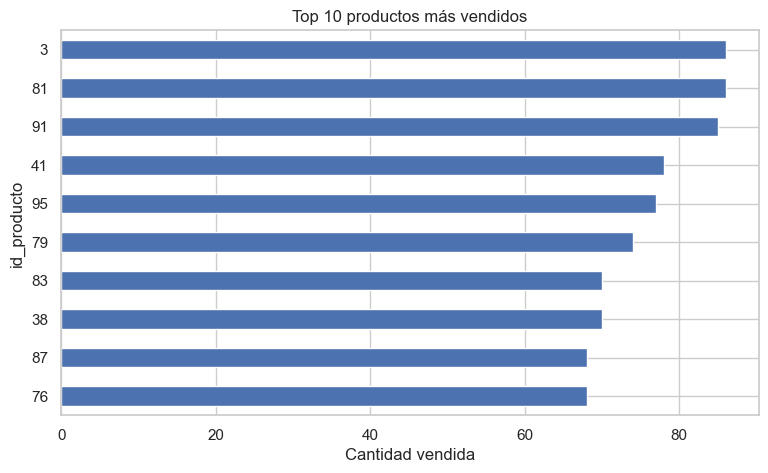

Productos más vendidos:
3 - Sprite 1.5L - 86
81 - Aceitunas Verdes 200g - 86
91 - Desodorante Ambiente Aerosol - 85
41 - Aceite de Girasol 900ml - 78
95 - Jabón de Tocador x3 - 77
79 - Hamburguesas Congeladas x4 - 74
83 - Queso Untable 190g - 70
38 - Harina Leudante 1kg - 70
87 - Detergente Ropa Color 800g - 68
76 - Pizza Congelada Muzzarella - 68


In [254]:
#Productos más vendidos
# Agrupamos por id_producto y sumamos las cantidades
top_productos = df_master.groupby("id_producto")["cantidad"].sum().sort_values(ascending=False).head(10)
# Generamos la gráfica
top_productos.plot(kind="barh", title="Top 10 productos más vendidos", figsize=(9,5))
plt.xlabel("Cantidad vendida")
plt.gca().invert_yaxis()
plt.show()

# Obtenemos los nombres de los productos
productos_dict = df_productos.set_index("id_producto")["nombre_producto"].to_dict()
# Generamos el print con id_producto, nombre_producto y cantidad
print("Productos más vendidos:")
for id_producto, cantidad in top_productos.items():
    nombre_producto = productos_dict.get(id_producto, "Desconocido")
    print(f"{id_producto} - {nombre_producto} - {cantidad}")

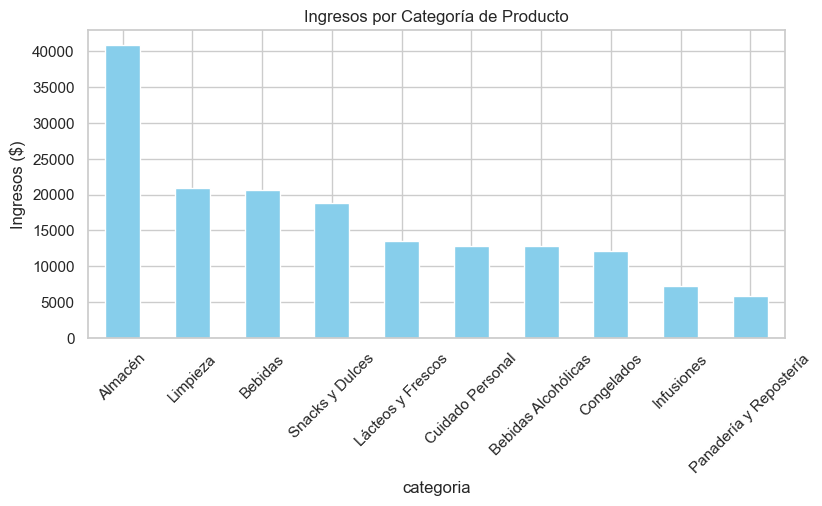

Ingresos por categoría:
Almacén - $40,878.35
Limpieza - $20,976.04
Bebidas - $20,594.92
Snacks y Dulces - $18,841.19
Lácteos y Frescos - $13,467.79
Cuidado Personal - $12,769.39
Bebidas Alcohólicas - $12,767.25
Congelados - $12,083.05
Infusiones - $7,260.74
Panadería y Repostería - $5,801.45


In [255]:
#Ingresos por categoría
ingresos_categoria = df_master.groupby("categoria")["monto_final"].sum().sort_values(ascending=False)
ingresos_categoria.plot(kind="bar", title="Ingresos por Categoría de Producto", figsize=(9,4), color='skyblue')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por categoría:")
for categoria, monto in ingresos_categoria.items():
    print(f"{categoria} - ${monto:,.2f}")

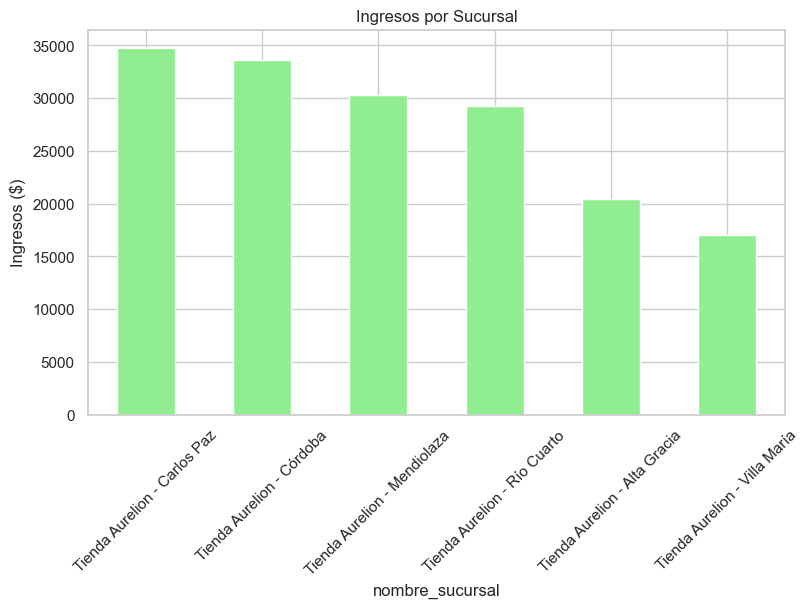

Ingresos por sucursal:
Tienda Aurelion - Carlos Paz - $34,760.12
Tienda Aurelion - Córdoba - $33,618.05
Tienda Aurelion - Mendiolaza - $30,282.02
Tienda Aurelion - Río Cuarto - $29,223.06
Tienda Aurelion - Alta Gracia - $20,491.82
Tienda Aurelion - Villa María - $17,065.11


In [256]:
#Ingresos por sucursal
ingresos_sucursal = df_master.groupby("nombre_sucursal")["monto_final"].sum().sort_values(ascending=False)
ingresos_sucursal.plot(kind="bar", title="Ingresos por Sucursal", figsize=(9,5), color='lightgreen')
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.show()

print("Ingresos por sucursal:")
for sucursal, monto in ingresos_sucursal.items():
    print(f"{sucursal} - ${monto:,.2f}")

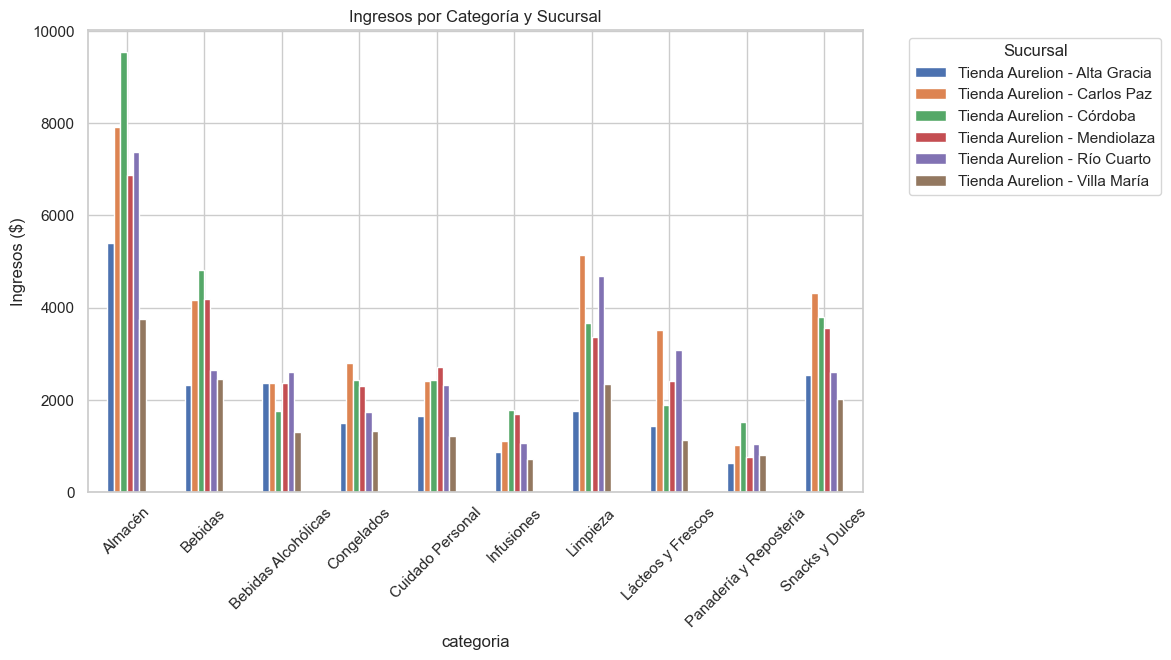

Ingresos por categoría y sucursal:
Almacén - Tienda Aurelion - Alta Gracia - $5,395.62
Almacén - Tienda Aurelion - Carlos Paz - $7,915.63
Almacén - Tienda Aurelion - Córdoba - $9,542.49
Almacén - Tienda Aurelion - Mendiolaza - $6,880.83
Almacén - Tienda Aurelion - Río Cuarto - $7,384.35
Almacén - Tienda Aurelion - Villa María - $3,759.42
Bebidas - Tienda Aurelion - Alta Gracia - $2,328.03
Bebidas - Tienda Aurelion - Carlos Paz - $4,166.65
Bebidas - Tienda Aurelion - Córdoba - $4,818.14
Bebidas - Tienda Aurelion - Mendiolaza - $4,182.36
Bebidas - Tienda Aurelion - Río Cuarto - $2,654.10
Bebidas - Tienda Aurelion - Villa María - $2,445.65
Bebidas Alcohólicas - Tienda Aurelion - Alta Gracia - $2,372.49
Bebidas Alcohólicas - Tienda Aurelion - Carlos Paz - $2,365.18
Bebidas Alcohólicas - Tienda Aurelion - Córdoba - $1,751.15
Bebidas Alcohólicas - Tienda Aurelion - Mendiolaza - $2,369.07
Bebidas Alcohólicas - Tienda Aurelion - Río Cuarto - $2,605.70
Bebidas Alcohólicas - Tienda Aurelion - Vi

In [257]:
#Ingresos por categoría y sucursal
ingresos_categoria_sucursal = df_master.groupby(["categoria", "nombre_sucursal"])["monto_final"].sum().unstack()
ingresos_categoria_sucursal.plot(kind="bar", title="Ingresos por Categoría y Sucursal", figsize=(10,6))
plt.ylabel("Ingresos ($)")
plt.xticks(rotation=45)
plt.legend(title="Sucursal", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Ingresos por categoría y sucursal:")
for categoria, sucursales in ingresos_categoria_sucursal.iterrows():
    for sucursal, monto in sucursales.items():
        print(f"{categoria} - {sucursal} - ${monto:,.2f}")

C:\Users\KEILY\AppData\Local\Temp\ipykernel_12344\3196318759.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")


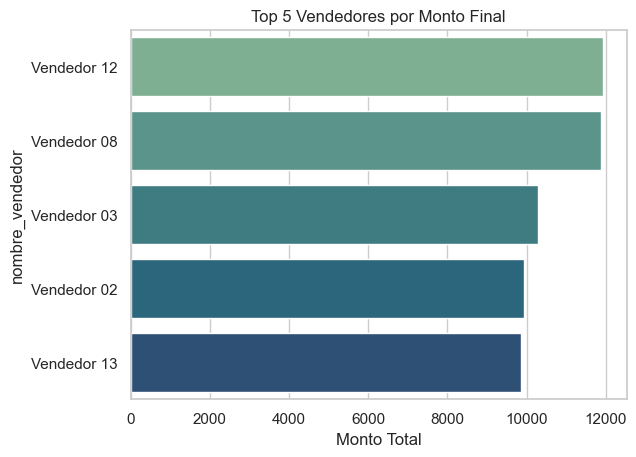

Top Vendedores:
Vendedor 12 - $11,929.14
Vendedor 08 - $11,891.23
Vendedor 03 - $10,281.52
Vendedor 02 - $9,942.16
Vendedor 13 - $9,859.00


In [258]:
#Top vendedores
top_vendedores = df_master.groupby("nombre_vendedor")["monto_final"].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_vendedores.values, y=top_vendedores.index, palette="crest")
plt.title("Top 5 Vendedores por Monto Final")
plt.xlabel("Monto Total")
plt.show()

print("Top Vendedores:")
for vendedor, monto in top_vendedores.items():
    print(f"{vendedor} - ${monto:,.2f}")

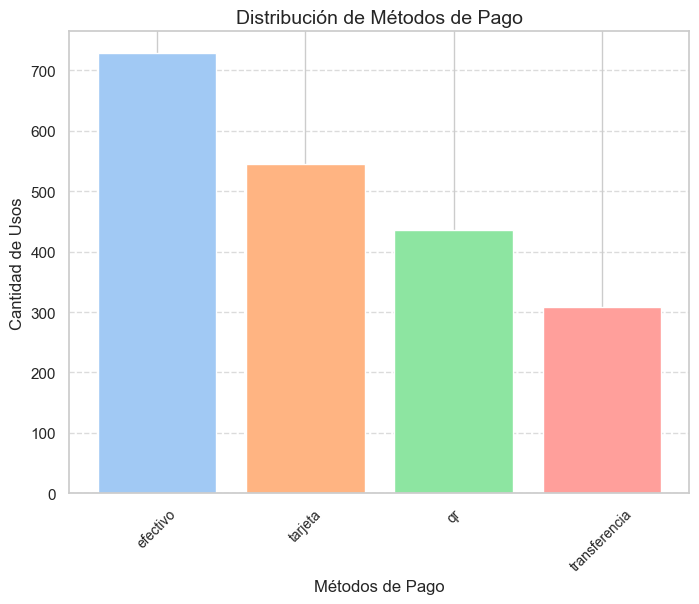

Distribución de métodos de pago:
efectivo - 728 usos
tarjeta - 545 usos
qr - 435 usos
transferencia - 308 usos


In [259]:
# Distribución de métodos de pago
metodos = df_master["nombre_medio_pago"].value_counts()
plt.figure(figsize=(8,6))
colors = sns.color_palette("pastel")
plt.bar(metodos.index, metodos.values, color=colors)
plt.title("Distribución de Métodos de Pago", fontsize=14)
plt.xlabel("Métodos de Pago", fontsize=12)
plt.ylabel("Cantidad de Usos", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Distribución de métodos de pago:")
for metodo, cantidad in metodos.items():
    print(f"{metodo} - {cantidad} usos")

## Conclusión Spring 1

Este análisis permitió consolidar múltiples fuentes de datos en un solo reporte integral. Se identificaron productos clave, vendedores destacados, diferencias entre sucursales y comportamiento de clientes frente a medios de pago.

Además, se logró:

- **Unificación de datos**: Integrar información de diversas tablas para obtener una vista completa del negocio.
- **Análisis detallado**: Identificar patrones de ventas, ingresos por categoría y sucursal, y métodos de pago preferidos.
- **Visualización efectiva**: Utilizar gráficos claros para comunicar hallazgos clave.

Estos resultados son fundamentales para tomar decisiones estratégicas basadas en datos y optimizar procesos internos. El siguiente paso será profundizar en el análisis predictivo y explorar nuevas oportunidades de crecimiento.

## Reflexiones y Próximos Pasos

El análisis realizado en este notebook nos brinda una perspectiva integral sobre las ventas y el comportamiento de los clientes. Sin embargo, siempre hay espacio para mejorar:

- **Profundizar en el análisis predictivo**: Utilizar modelos de machine learning para anticipar tendencias de ventas y comportamiento de clientes.
- **Segmentación avanzada**: Identificar grupos de clientes con características similares para personalizar estrategias de marketing.
- **Optimización de inventarios**: Analizar patrones de ventas para mejorar la gestión de stock y reducir costos.
- **Visualizaciones interactivas**: Implementar dashboards dinámicos que permitan explorar los datos de manera más intuitiva.

Estos pasos no solo fortalecerán la toma de decisiones, sino que también abrirán nuevas oportunidades para el crecimiento del negocio.

# Proyecto Tienda Aurelion SPRING 2
# Desarrollo de aplicación de técnicas estadisticas:
  1. Base de datos limpia y lista
  2. Calcular estadísticas básicas calculadas
  3. Identificar tipo de distribución de variables
  4. Análisis de correlaciones entre variables principales
  5. Detección deoutliers mediante curatiles y rangos
  6. Interpretar resultados para el problema de negocio
  7. Documentar


## 1: Base de datos limpia y lista
### Caracterización inicial del DataFrame `df_master`

En esta fase, realizaremos una caracterización inicial del DataFrame `df_master`, que es la unificación de las 7 tablas de la base de datos extendida, para comprender su estructura y contenido. Utilizaremos métodos de pandas para obtener estadísticas descriptivas y visualizaciones para entender la distribución de las variables numéricas.

## Información general del DataFrame


### Visualización de las primeras filas del DataFrame

In [260]:
# Mostrar las primeras filas del DataFrame df_master
print("Primeras 5 filas del DataFrame df_master:")
display(df_master.head())

Primeras 5 filas del DataFrame df_master:


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo,2023,1,Monday,0.0,29.02
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,119.70
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,23.45
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,81.22
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,20.69


## Verificación de tipos de datos

Utilizaremos el método `.info()` para obtener un resumen de los tipos de datos de cada columna en el DataFrame `df_master`.

In [261]:
# Proporcionar una vista compacta de la estructura interna del DataFrame
print("\nInformación general sobre los tipos de datos del DataFrame df_master:")
df_master.info()


Información general sobre los tipos de datos del DataFrame df_master:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id_venta                2016 non-null   int64         
 1   id_producto             2016 non-null   int64         
 2   nombre_producto_x       2016 non-null   object        
 3   cantidad                2016 non-null   int64         
 4   precio_unitario_x       2016 non-null   float64       
 5   importe                 2016 non-null   float64       
 6   descuento_aplicado_pct  2016 non-null   int64         
 7   subtotal                2016 non-null   float64       
 8   nombre_producto_y       2016 non-null   object        
 9   categoria               2016 non-null   object        
 10  precio_unitario_y       2016 non-null   float64       
 11  subcategoria            2016 non-null

### Verificación de la conversión de fechas en `df_master`

Confirmaremos que las columnas de fecha (`fecha_alta`, `fecha`, `fecha_ingreso`) tienen el tipo de dato `datetime64[ns]`.

In [262]:
# Mostrar los tipos de datos específicos de las columnas de fecha
print("\nTipos de datos de las columnas de fecha:")
print(df_master[['fecha_alta', 'fecha', 'fecha_ingreso']].dtypes)


Tipos de datos de las columnas de fecha:
fecha_alta       datetime64[ns]
fecha            datetime64[ns]
fecha_ingreso    datetime64[ns]
dtype: object


## Verificación de datos Completos

Según los criterios del Anexo, los datos esenciales no deben estar nulos o incompletos. En esta sección, verificaremos la presencia de valores nulos en el DataFrame `df_master` para asegurar que no faltan datos esenciales para el análisis.



### Verificación de valores nulos

Utilizaremos el método `.isnull().sum()` para contar el número de valores nulos por columna en el DataFrame `df_master`.

In [263]:
# Verificar valores nulos en cada columna de df_master
print("Número de valores nulos por columna en df_master:")
display(df_master.isnull().sum())

Número de valores nulos por columna en df_master:


id_venta                  0
id_producto               0
nombre_producto_x         0
cantidad                  0
precio_unitario_x         0
importe                   0
descuento_aplicado_pct    0
subtotal                  0
nombre_producto_y         0
categoria                 0
precio_unitario_y         0
subcategoria              0
fecha                     0
id_cliente                0
id_sucursal_x             0
id_vendedor               0
id_medio_pago             0
nombre_cliente_x          0
email_x                   0
medio_pago_original       0
estado_venta              0
monto_bruto               0
monto_neto                0
nombre_cliente_y          0
email_y                   0
ciudad_x                  0
fecha_alta                0
genero                    0
edad_rango                0
activo_como_cliente       0
nombre_sucursal           0
ciudad_y                  0
provincia                 0
nombre_vendedor           0
id_sucursal_y             0
fecha_ingreso       

### 2: Calcular estadísticas básicas calculadas

En esta fase, realizaremos cálculos de estadísticas descriptivas para las variables numéricas clave en `df_master` para comprender su distribución y características centrales.

In [264]:
# Mostrar un resumen estadístico de las variables numéricas del DataFrame
print("\nResumen estadístico de las variables numéricas de df_master:")
display(df_master.describe())


Resumen estadístico de las variables numéricas de df_master:


,id_venta,id_producto,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,precio_unitario_y,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,monto_bruto,monto_neto,fecha_alta,id_sucursal_y,fecha_ingreso,año,mes,descuento_pct,monto_final
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016,2016.000000,2016,2016.000000,2016.000000,2016.000000,2016.000000
mean,346.531250,50.322421,2.675595,31.447951,83.859435,1.173115,82.917202,31.447951,2023-10-21 22:18:34.285714432,49.303075,3.310020,10.443452,2.160218,279.660109,279.660109,2023-02-18 07:16:25.714285824,3.310020,2022-12-21 23:32:08.571428352,2023.407242,5.295139,0.011731,82.063579
min,1.000000,1.000000,1.000000,2.720000,2.720000,0.000000,2.720000,2.720000,2023-01-02 00:00:00,1.000000,1.000000,1.000000,1.000000,2.720000,2.720000,2023-01-01 00:00:00,1.000000,2022-04-06 00:00:00,2023.000000,1.000000,0.000000,2.720000
25%,153.000000,25.000000,2.000000,20.690000,40.397500,0.000000,39.620000,20.690000,2023-06-03 00:00:00,25.000000,2.000000,6.000000,1.000000,170.800000,170.800000,2023-01-25 00:00:00,2.000000,2022-06-09 00:00:00,2023.000000,3.000000,0.000000,39.060000
50%,344.500000,49.500000,3.000000,32.040000,76.395000,0.000000,74.310000,32.040000,2023-11-09 00:00:00,46.000000,3.000000,10.000000,2.000000,261.700000,261.700000,2023-02-15 00:00:00,3.000000,2023-01-23 00:00:00,2023.000000,5.000000,0.000000,73.080000
75%,534.000000,76.000000,4.000000,42.860000,121.440000,0.000000,120.560000,42.860000,2024-03-14 00:00:00,75.000000,5.000000,15.000000,3.000000,375.720000,375.720000,2023-03-16 00:00:00,5.000000,2023-07-13 00:00:00,2024.000000,7.000000,0.000000,119.037500
max,720.000000,100.000000,5.000000,49.820000,249.100000,15.000000,248.650000,49.820000,2024-06-28 00:00:00,100.000000,6.000000,20.000000,4.000000,786.510000,786.510000,2023-04-10 00:00:00,6.000000,2023-10-28 00:00:00,2024.000000,12.000000,0.150000,248.650000
std,212.057682,29.104692,1.256218,12.825875,54.423370,3.098914,54.022666,12.825875,NaN,29.916773,1.808614,5.583721,1.078380,146.116374,146.116374,NaN,1.808614,NaN,0.491443,3.270546,0.030989,53.797310


### Visualización de la distribución de variables numéricas

A continuación, generaremos histogramas para visualizar la distribución de algunas variables numéricas clave en `df_master`.

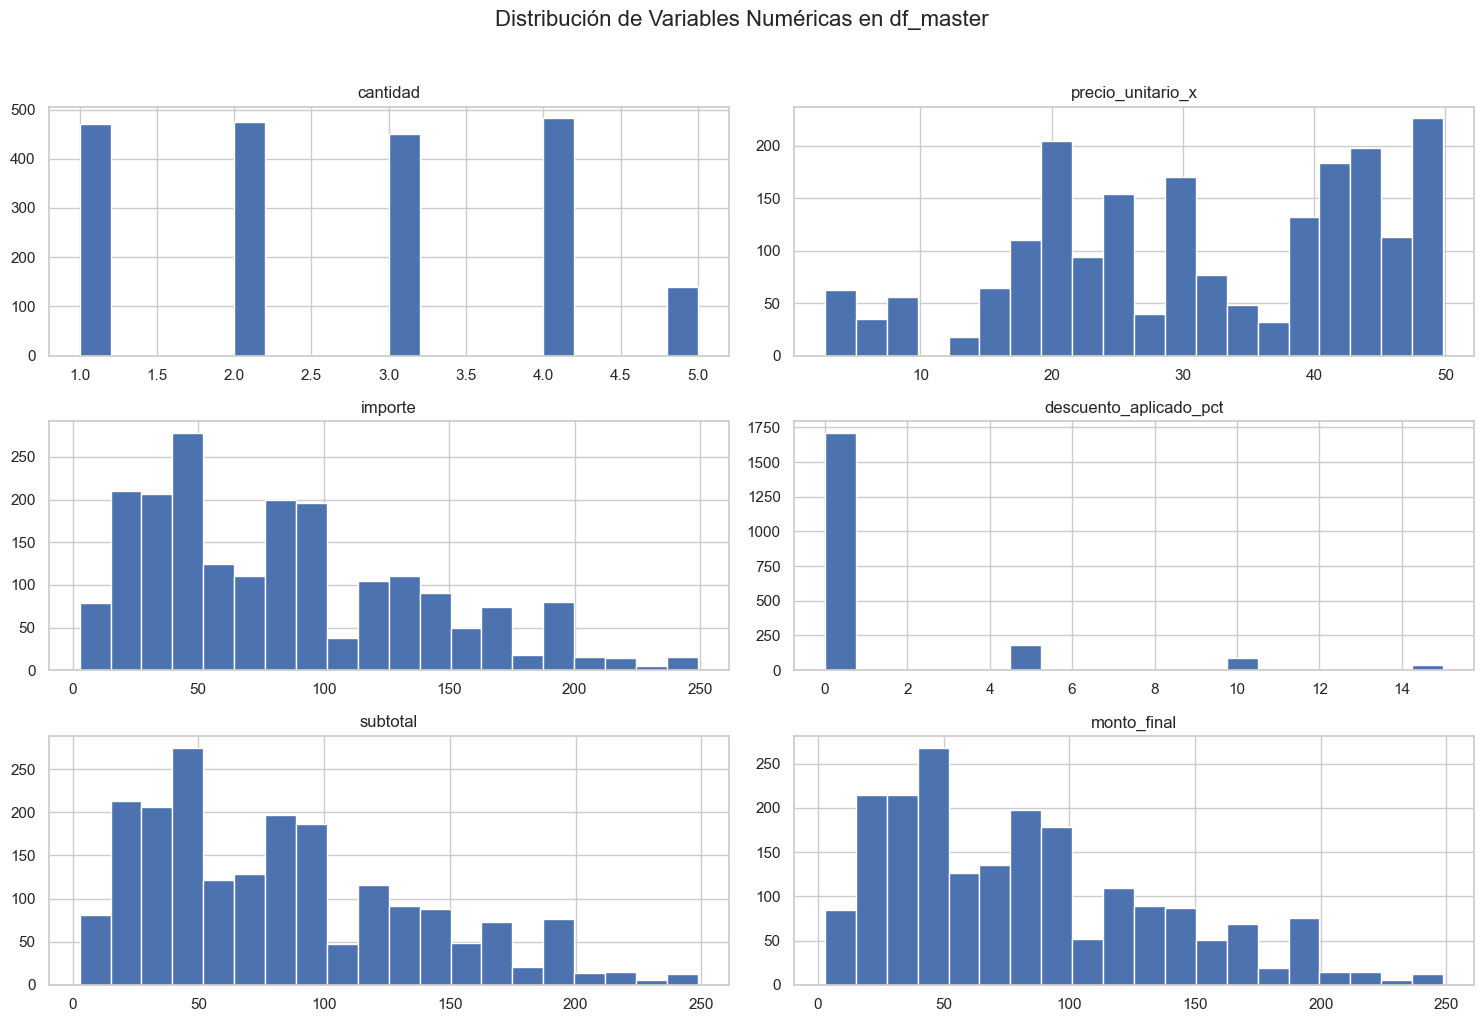

In [265]:
# Seleccionar columnas numéricas para visualización de distribución
numerical_cols_viz = ['cantidad', 'precio_unitario_x', 'importe', 'descuento_aplicado_pct', 'subtotal', 'monto_final']

# Crear histogramas para cada columna numérica seleccionada
df_master[numerical_cols_viz].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribución de Variables Numéricas en df_master", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Los histogramas generados nos proporcionan una visión gráfica de cómo se distribuyen los valores en las variables numéricas clave de nuestro DataFrame `df_master`, lo que nos ayuda comprender su distribución y características centrales:



### Resumen estadístico de las variables numéricas

Calcularemos y mostraremos un resumen estadístico de las variables numéricas relevantes en el DataFrame.

| Estadístico | cantidad | precio_unitario_x | importe | descuento_aplicado_pct | subtotal | monto_bruto | monto_neto | monto_final |
|---|---|---|---|---|---|---|---|---|
| count | 2016 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 | 2016.00 |
| mean | 2.68 | 31.45 | 83.86 | 1.17 | 82.92 | 279.66 | 279.66 | 82.06 |
| std | 1.26 | 12.83 | 54.42 | 3.10 | 54.02 | 146.12 | 146.12 | 53.80 |
| min | 1.00 | 2.72 | 2.72 | 0.00 | 2.72 | 2.72 | 2.72 | 2.72 |
| 25% | 2.00 | 20.69 | 40.40 | 0.00 | 39.62 | 170.80 | 170.80 | 39.06 |
| 50% | 3.00 | 32.04 | 76.40 | 0.00 | 74.31 | 261.70 | 261.70 | 73.08 |
| 75% | 4.00 | 42.86 | 121.44 | 0.00 | 120.56 | 375.72 | 375.72 | 119.04 |
| max | 5.00 | 49.82 | 249.10 | 15.00 | 248.65 | 786.51 | 786.51 | 248.65 |

### Interpretación de las Estadísticas Descriptivas de Variables Numéricas

Las estadísticas descriptivas para las variables numéricas clave en `df_master` nos proporcionan un resumen cuantitativo de su distribución y características centrales:

*   **`cantidad`**:
    *   **count (2016)**: Hay 2016 registros de cantidad de productos por detalle de venta.
    *   **mean (2.68)**: En promedio, se venden aproximadamente 2.68 unidades por detalle de venta.
    *   **std (1.26)**: La desviación estándar es de 1.26, lo que indica una dispersión moderada alrededor de la media.
    *   **min (1.00)**: La cantidad mínima vendida en un detalle de venta es 1 unidad.
    *   **25% (2.00)**: El 25% de los detalles de venta tienen 2 unidades o menos.
    *   **50% (3.00)**: La mediana es 3 unidades, lo que significa que la mitad de los detalles de venta tienen 3 unidades o menos.
    *   **75% (4.00)**: El 75% de los detalles de venta tienen 4 unidades o menos.
    *   **max (5.00)**: La cantidad máxima vendida en un detalle de venta es 5 unidades.
    *   **Hallazgo**: La mayoría de las transacciones involucran una cantidad pequeña de productos (entre 1 y 4), lo que se alinea con la observación de los histogramas.

*   **`precio_unitario_x`**:
    *   **count (2016)**: Hay 2016 registros de precio unitario por detalle de venta.
    *   **mean (31.45)**: El precio unitario promedio de los productos es de aproximadamente $31.45.
    *   **std (12.83)**: La desviación estándar de 12.83 sugiere una variabilidad considerable en los precios unitarios.
    *   **min (2.72)**: El precio unitario mínimo es de $2.72.
    *   **max (49.82)**: El precio unitario máximo es de $49.82.
    *   **Hallazgo**: Existe una amplia gama de precios unitarios en los productos, como se observó en el histograma.

*   **`importe`**:
    *   **count (2016)**: Hay 2016 registros de importe por detalle de venta.
    *   **mean (83.86)**: El importe promedio por detalle de venta es de aproximadamente $83.86.
    *   **std (54.42)**: La desviación estándar de 54.42 es relativamente alta en comparación con la media, lo que indica una dispersión significativa de los importes.
    *   **min (2.72)**: El importe mínimo es de $2.72.
    *   **max (249.10)**: El importe máximo es de $249.10.
    *   **Hallazgo**: La media es notablemente mayor que la mediana (76.40), lo que confirma la asimetría positiva observada en el histograma, con algunos detalles de venta de alto importe.

*   **`descuento_aplicado_pct`**:
    *   **count (2016)**: Hay 2016 registros de porcentaje de descuento aplicado.
    *   **mean (1.17)**: El porcentaje de descuento promedio aplicado es muy bajo, alrededor del 1.17%.
    *   **std (3.10)**: La desviación estándar es de 3.10, lo que indica que la mayoría de los descuentos son 0, pero existen algunos valores más altos que generan dispersión.
    *   **min (0.00)**: El descuento mínimo aplicado es 0%.
    *   **25% (0.00)**, **50% (0.00)**, **75% (0.00)**: Los cuartiles indican que el 75% de los detalles de venta no tienen descuento.
    *   **max (15.00)**: El descuento máximo aplicado es del 15%.
    *   **Hallazgo**: Los descuentos no son una práctica común en la mayoría de las transacciones.

*   **`subtotal`**:
    *   **count (2016)**: Hay 2016 registros de subtotal por detalle de venta.
    *   **mean (82.92)**: El subtotal promedio por detalle de venta es de aproximadamente $82.92.
    *   **std (54.02)**: La desviación estándar es de 54.02, similar a la del `importe`, lo que indica una dispersión comparable.
    *   **min (2.72)**: El subtotal mínimo es de $2.72.
    *   **max (248.65)**: El subtotal máximo es de $248.65.
    *   **Hallazgo**: Al igual que el `importe`, la media (82.92) es mayor que la mediana (74.31), confirmando la asimetría positiva.

*   **`monto_bruto`**:
    *   **count (2016)**: Hay 2016 registros de monto bruto por venta.
    *   **mean (279.66)**: El monto bruto promedio por venta es de aproximadamente $279.66.
    *   **std (146.12)**: La desviación estándar de 146.12 es alta, lo que indica una gran variabilidad en el monto total de las ventas.
    *   **min (2.72)**: El monto bruto mínimo es de $2.72.
    *   **max (786.51)**: El monto bruto máximo es de $786.51.
    *   **Hallazgo**: Existe una amplia dispersión en el valor total de las ventas.

*   **`monto_neto`**:
    *   **count (2016)**: Hay 2016 registros de monto neto por venta.
    *   **mean (279.66)**: El monto neto promedio por venta es de aproximadamente $279.66.
    *   **std (146.12)**: La desviación estándar es de 146.12, idéntica a la del monto bruto, lo que sugiere que los descuentos aplicados a nivel de detalle de venta no impactan significativamente el monto total a nivel de venta en promedio.
    *   **min (2.72)**: El monto neto mínimo es de $2.72.
    *   **max (786.51)**: El monto neto máximo es de $786.51.
    *   **Hallazgo**: El monto neto es igual al monto bruto en este dataset, lo que indica que los descuentos aplicados a nivel de detalle de venta no se reflejan en las columnas `monto_bruto` y `monto_neto` de la tabla de ventas principal. Esto podría ser un punto a investigar o tener en cuenta para futuros análisis si se espera que los descuentos afecten el monto total de la venta.

*   **`monto_final`**:
    *   **count (2016)**: Hay 2016 registros de monto final por detalle de venta.
    *   **mean (82.06)**: El monto final promedio por detalle de venta es de aproximadamente $82.06.
    *   **std (53.80)**: La desviación estándar es de 53.80, similar a la del `importe` y `subtotal`.
    *   **min (2.72)**: El monto final mínimo es de $2.72.
    *   **max (248.65)**: El monto final máximo es de $248.65.
    *   **Hallazgo**: El monto final, que considera el descuento a nivel de detalle, es ligeramente menor que el `importe` y `subtotal` promedio, lo cual es lógico, aunque la diferencia es pequeña debido al bajo porcentaje promedio de descuento aplicado.

   En general, las variables relacionadas con el valor monetario de las transacciones (`importe`, `subtotal`, `monto_final`) muestran distribuciones sesgadas hacia la derecha, lo que es común en datos de ventas donde la mayoría de las transacciones son de bajo valor, pero existen algunas transacciones de alto valor que tiran la media hacia arriba. La variable `cantidad` indica que las compras suelen ser de pocos artículos, y `descuento_aplicado_pct` confirma que los descuentos no son una práctica generalizada.

## Aplicación de estadísticas avanzadas

En esta sección se calculan y analizan estadísticas descriptivas avanzadas de las variables numéricas del `df_master`. Se incluyen medidas como el Coeficiente de Varianza (CV), el Rango Intercuartílico (IQR), Asimetría y Curtosis, que proporcionan una visión más profunda sobre la distribución y dispersión de los datos. Los resultados se presentan de forma detallada para cada variable, permitiendo una interpretación más completa de sus características estadísticas.


In [266]:
# Estadísticas descriptivas avanzadas
vars_numericas = ['cantidad', 'precio_unitario_x', 'importe', 'subtotal', 'monto_bruto', 'monto_neto', 'monto_final']

print("\n ESTADÍSTICAS DESCRIPTIVAS AVANZADAS")
print("="*70)

stats_df = df_master[vars_numericas].describe(percentiles=[.25, .5, .75, .90, .95, .99]).T
stats_df['cv'] = stats_df['std'] / stats_df['mean']  # Coeficiente de variación
stats_df['iqr'] = stats_df['75%'] - stats_df['25%']  # Rango intercuartílico
stats_df['skewness'] = df_master[vars_numericas].skew()  # Asimetría
stats_df['kurtosis'] = df_master[vars_numericas].kurtosis()  # Curtosis

display(stats_df.round(4))

print("\nINTERPRETACIÓN:")
for var in vars_numericas:
    skew = stats_df.loc[var, 'skewness']
    kurt = stats_df.loc[var, 'kurtosis']
    cv = stats_df.loc[var, 'cv']

    print(f"\n{var}:")
    print(f"  • Asimetría: {skew:.3f} ({'Sesgada a derecha' if skew > 0.5 else 'Sesgada a izquierda' if skew < -0.5 else 'Simétrica'})")
    print(f"  • Curtosis: {kurt:.3f} ({'Leptocúrtica' if kurt > 1 else 'Platicúrtica' if kurt < -1 else 'Mesocúrtica'})")
    print(f"  • CV: {cv:.2%} ({'Alta variabilidad' if cv > 0.3 else 'Variabilidad moderada'})")


 ESTADÍSTICAS DESCRIPTIVAS AVANZADAS


,count,mean,std,min,25%,50%,75%,90%,95%,99%,max,cv,iqr,skewness,kurtosis
cantidad,2016.0,2.6756,1.2562,1.00,2.0000,3.000,4.0000,4.00,5.00,5.0000,5.00,0.4695,2.0000,0.1312,-1.1358
precio_unitario_x,2016.0,31.4480,12.8259,2.72,20.6900,32.040,42.8600,47.77,48.83,49.8200,49.82,0.4078,22.1700,-0.3323,-0.9250
importe,2016.0,83.8594,54.4234,2.72,40.3975,76.395,121.4400,167.88,191.12,222.9500,249.10,0.6490,81.0425,0.7295,-0.2373
subtotal,2016.0,82.9172,54.0227,2.72,39.6200,74.310,120.5600,166.80,190.33,221.8862,248.65,0.6515,80.9400,0.7433,-0.2151
monto_bruto,2016.0,279.6601,146.1164,2.72,170.8000,261.700,375.7200,472.74,555.35,673.4160,786.51,0.5225,204.9200,0.6386,0.1296
monto_neto,2016.0,279.6601,146.1164,2.72,170.8000,261.700,375.7200,472.74,555.35,673.4160,786.51,0.5225,204.9200,0.6386,0.1296
monto_final,2016.0,82.0636,53.7973,2.72,39.0600,73.080,119.0375,165.68,190.08,216.7225,248.65,0.6556,79.9775,0.7619,-0.1801



INTERPRETACIÓN:

cantidad:
  • Asimetría: 0.131 (Simétrica)
  • Curtosis: -1.136 (Platicúrtica)
  • CV: 46.95% (Alta variabilidad)

precio_unitario_x:
  • Asimetría: -0.332 (Simétrica)
  • Curtosis: -0.925 (Mesocúrtica)
  • CV: 40.78% (Alta variabilidad)

importe:
  • Asimetría: 0.729 (Sesgada a derecha)
  • Curtosis: -0.237 (Mesocúrtica)
  • CV: 64.90% (Alta variabilidad)

subtotal:
  • Asimetría: 0.743 (Sesgada a derecha)
  • Curtosis: -0.215 (Mesocúrtica)
  • CV: 65.15% (Alta variabilidad)

monto_bruto:
  • Asimetría: 0.639 (Sesgada a derecha)
  • Curtosis: 0.130 (Mesocúrtica)
  • CV: 52.25% (Alta variabilidad)

monto_neto:
  • Asimetría: 0.639 (Sesgada a derecha)
  • Curtosis: 0.130 (Mesocúrtica)
  • CV: 52.25% (Alta variabilidad)

monto_final:
  • Asimetría: 0.762 (Sesgada a derecha)
  • Curtosis: -0.180 (Mesocúrtica)
  • CV: 65.56% (Alta variabilidad)


### Interpretación de las Estadísticas Descriptivas Avanzadas

El análisis de estadísticas descriptivas avanzadas revela:

*   **Variables Monetarias (`importe`, `subtotal`, `monto_final`, `monto_bruto`, `monto_neto`):** Presentan **asimetría positiva** (sesgadas a la derecha) y **alta variabilidad** (alto Coeficiente de Variación). Esto indica que hay muchas transacciones de bajo valor y un menor número de transacciones de alto valor. La curtosis es mesocúrtica (similar a la normal en colas).
*   **`cantidad` y `precio_unitario_x`:** Muestran distribuciones más **simétricas** (baja asimetría) y **variabilidad moderada**. `cantidad` tiene colas más ligeras que la normal (platicúrtica).
*   **Relación Monto Bruto/Neto:** Las estadísticas confirman que `monto_bruto` y `monto_neto` tienen estadísticas idénticas, lo que reitera la necesidad de validar cómo se registran los descuentos a nivel de resumen de venta.

En síntesis, las variables monetarias muestran el comportamiento típico de datos de ventas con sesgo y alta dispersión, mientras que la cantidad y el precio unitario son más estables.

## 3: Identificación del tipo de distribución de variables numéricas

En esta fase, calcularemos el tipo de distribución de las variables numéricas clave en `df_master` para identificar y comprender la forma de sus distribuciones.

## Visualización de las Distribuciones

Utilizaremos box plots y violin plots. Estas visualizaciones nos ayudarán a entender mejor la dispersión, la presencia de outliers y la forma general de las distribuciones.

### Box plots (Diagramas de Caja)

Los box plots son útiles para visualizar la mediana, los cuartiles y la presencia de valores atípicos.

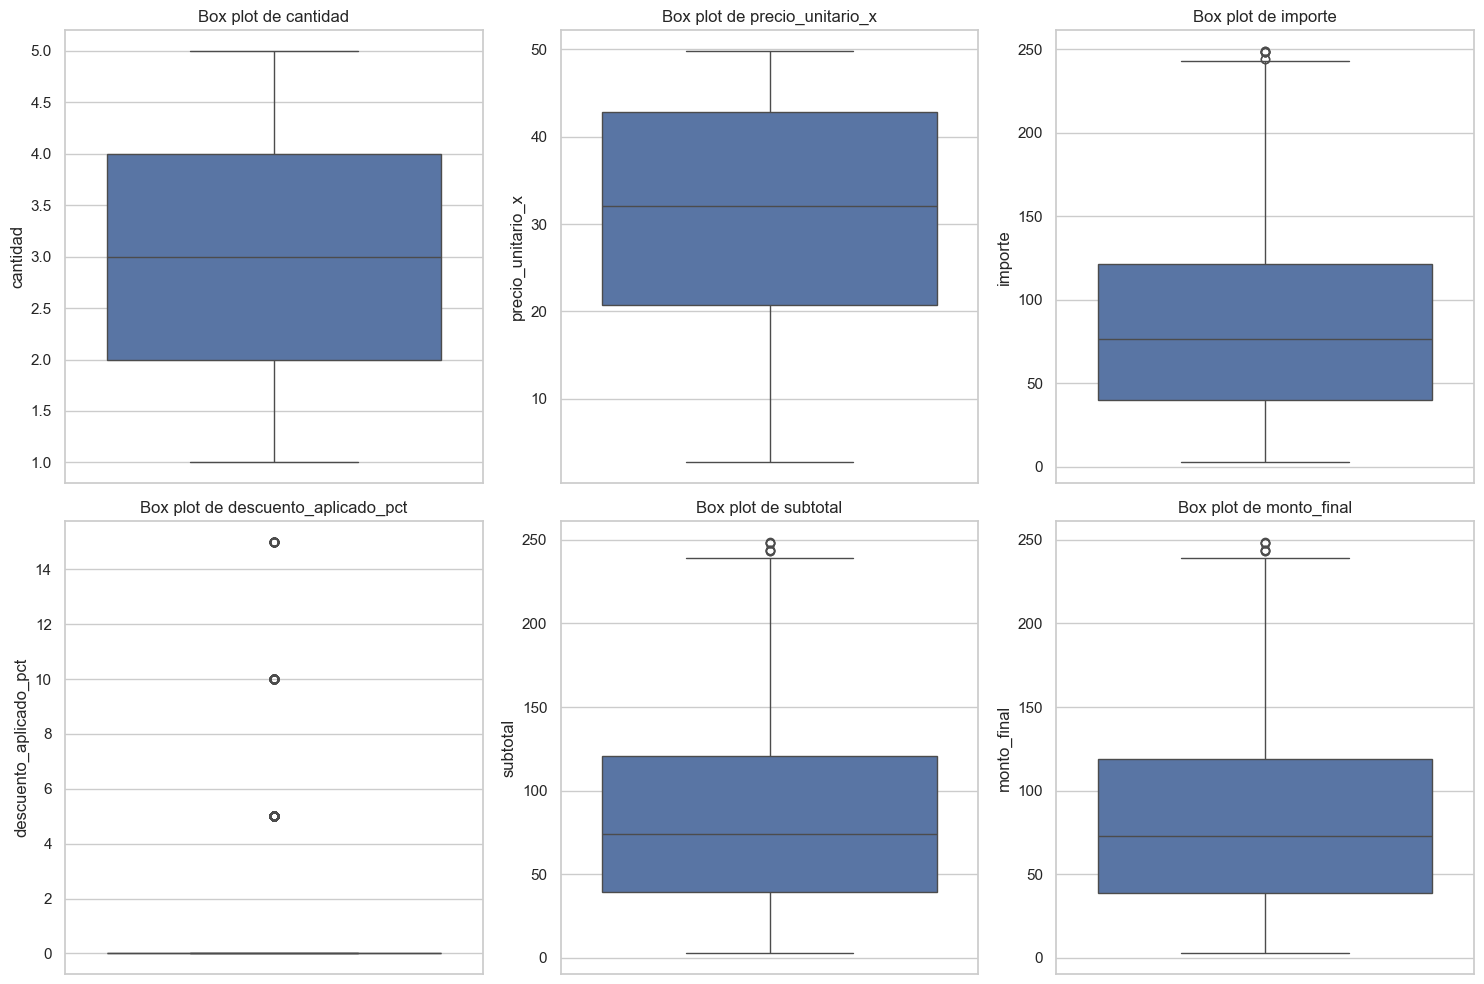

In [267]:
# Seleccionar columnas numéricas para visualización adicional
numerical_cols_viz = ['cantidad', 'precio_unitario_x', 'importe', 'descuento_aplicado_pct', 'subtotal', 'monto_final']

# Crear box plots para cada columna numérica seleccionada
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_master[col])
    plt.title(f'Box plot de {col}')
plt.tight_layout()
plt.savefig("box_plots.png")
plt.show()

### Interpretación de los Box plots

* **`cantidad`**: El box plot muestra que la mayoría de los valores están entre 2 y 4, con la mediana en 3. No parece haber outliers evidentes en esta variable.
* **`precio_unitario_x`**: La caja central abarca un rango amplio de precios, lo que concuerda con la desviación estándar observada. No se aprecian outliers significativos.
* **`importe`**, **`subtotal`**, **`monto_final`**: Estos box plots son similares y muestran una concentración de datos en la parte baja de la distribución, con una cola superior más larga y la presencia de algunos puntos que podrían ser considerados outliers (los puntos individuales por encima del bigote superior). Esto confirma el sesgo positivo identificado con la asimetría.
* **`descuento_aplicado_pct`**: Este box plot muestra claramente que la gran mayoría de los valores son 0. Los puntos individuales por encima de 0 representan los descuentos aplicados y son identificados como outliers por el método del box plot.

### Violin plots (Diagramas de Violín)

Los violin plots combinan un box plot con una estimación de la densidad de probabilidad, mostrando la forma de la distribución de manera más detallada.

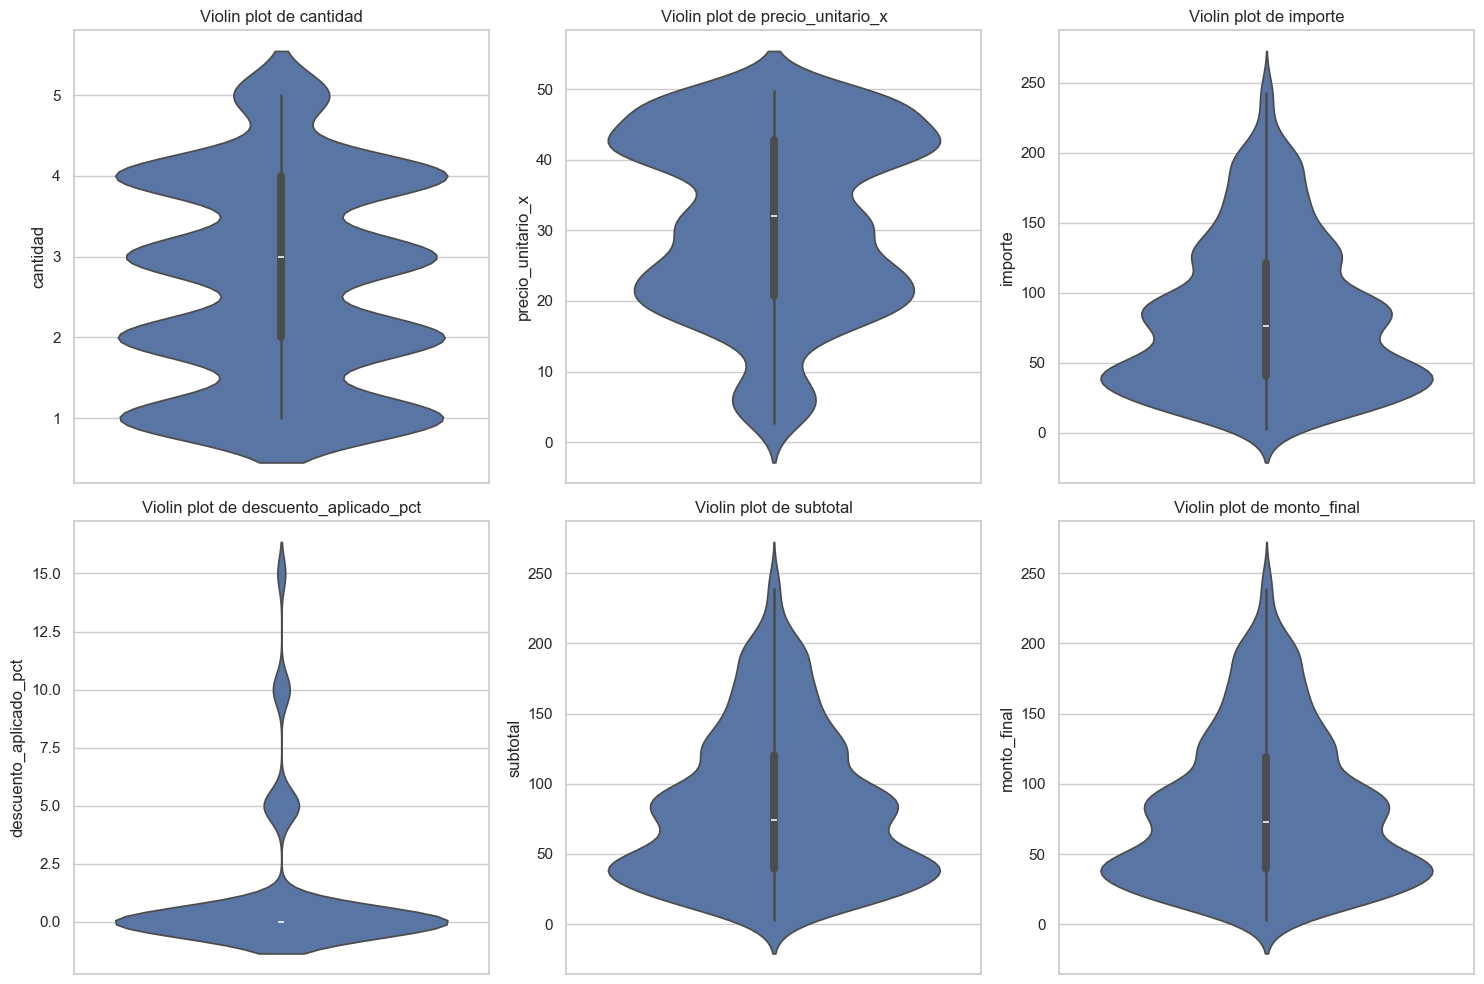

In [268]:
# Crear violin plots para cada columna numérica seleccionada
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_viz):
    plt.subplot(2, 3, i + 1)
    sns.violinplot(y=df_master[col])
    plt.title(f'Violin plot de {col}')
plt.savefig("violin_plots.png")
plt.tight_layout()
plt.show()

### Interpretación de los Violin plots

Los violin plots confirman las observaciones de los histogramas y box plots:

* **`cantidad`**: La forma del violín es relativamente simétrica alrededor de la mediana, aunque con mayor densidad en los valores enteros (1, 2, 3, 4, 5).
* **`precio_unitario_x`**: El violín muestra una distribución más extendida, sin picos pronunciados, lo que sugiere una distribución más uniforme de los precios unitarios.
* **`importe`**, **`subtotal`**, **`monto_final`**: La forma de estos violines es más ancha en la parte inferior y se estrecha hacia arriba, lo que ilustra claramente el sesgo positivo y la concentración de datos en valores más bajos.
* **`descuento_aplicado_pct`**: El violin plot para el descuento es muy estrecho en la parte inferior (en 0) y se ensancha ligeramente en los valores de descuento, mostrando visualmente la baja frecuencia de descuentos aplicados.



### Interpretación General del Tipo de Distribución de Variables Numéricas (Basado en Box Plots y Violin Plots)

En conjunto, estas visualizaciones nos brindan una comprensión más completa de la forma, dispersión y presencia de posibles outliers en las distribuciones de las variables numéricas. La combinación de Box plots y Violin plots nos ha proporcionado una confirmación visual robusta de las características de las distribuciones de las variables numéricas:

* Las variables monetarias a nivel de detalle de venta (`importe`, `subtotal`, `monto_final`) y a nivel de venta (`monto_bruto`, `monto_neto`) presentan un **fuerte sesgo positivo**, lo que es una característica típica de los datos de ventas donde hay muchas transacciones pequeñas y algunas pocas grandes.
* El `descuento_aplicado_pct` es una variable con una distribución extremadamente **no normal y altamente sesgada**, donde el valor 0 domina por completo.
* `cantidad` y `precio_unitario_x` tienen distribuciones más **equilibradas**, aunque no necesariamente normales, sin la presencia de outliers significativos según el método IQR en `cantidad`.

Estas visualizaciones son fundamentales para complementar las estadísticas descriptivas numéricas, ya que nos dan una intuición directa sobre la forma de los datos, la concentración de valores y la ubicación de posibles outliers, lo cual es vital para la fase de preparación de datos y la selección de técnicas de análisis posteriores.

## 4: Análisis de correlaciones entre variables principales

En esta fase, exploraremos las relaciones lineales entre las variables numéricas clave calculando la matriz de correlación y visualizándola mediante un mapa de calor.

### Cálculo de la Matriz de Correlación de Pearson

In [269]:
# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numerical_cols_corr = ['cantidad', 'precio_unitario_x', 'importe', 'subtotal', 'monto_bruto', 'monto_neto', 'monto_final']

# Calcular la matriz de correlación de Pearson
correlation_matrix_pearson = df_master[numerical_cols_corr].corr(method='pearson')

# Mostrar la matriz de correlación
print("\nMatriz de Correlación de Pearson de las variables numéricas clave en df_master:")
display(correlation_matrix_pearson)


Matriz de Correlación de Pearson de las variables numéricas clave en df_master:


,cantidad,precio_unitario_x,importe,subtotal,monto_bruto,monto_neto,monto_final
cantidad,1.000000,-0.017545,0.710145,0.709434,0.322723,0.322723,0.706964
precio_unitario_x,-0.017545,1.000000,0.626809,0.624753,0.219453,0.219453,0.621281
importe,0.710145,0.626809,1.000000,0.998489,0.406179,0.406179,0.994560
subtotal,0.709434,0.624753,0.998489,1.000000,0.404848,0.404848,0.998780
monto_bruto,0.322723,0.219453,0.406179,0.404848,1.000000,1.000000,0.402536
monto_neto,0.322723,0.219453,0.406179,0.404848,1.000000,1.000000,0.402536
monto_final,0.706964,0.621281,0.994560,0.998780,0.402536,0.402536,1.000000


### Visualización de la Matriz de Correlación de Pearson (Mapa de Calor)

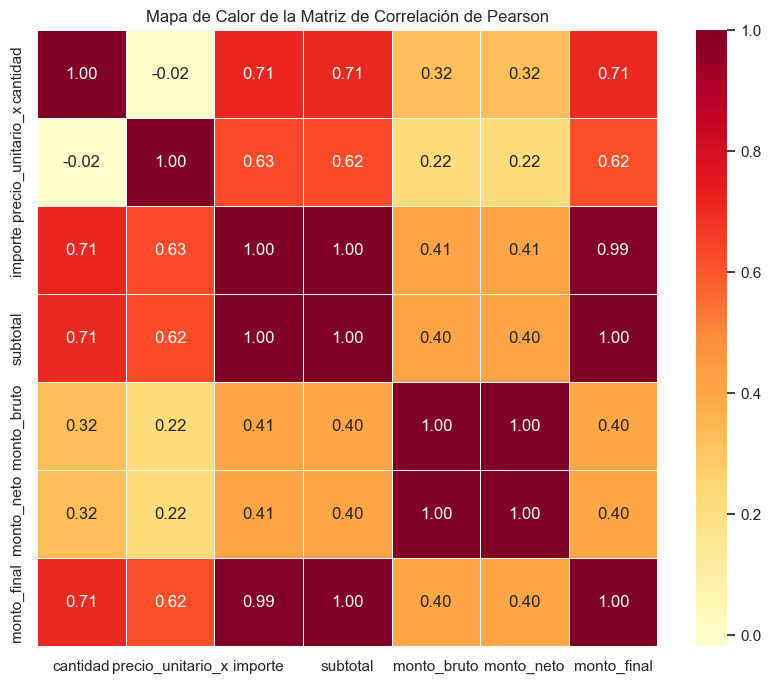

In [270]:
# Crear un mapa de calor (heatmap) de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de la Matriz de Correlación de Pearson") # Added label
plt.savefig("correlation_heatmap.png")
plt.show()

### Interpretación de la Matriz de Correlación y el Mapa de Calor

La matriz de correlación y el mapa de calor nos muestran la fuerza y dirección de la relación lineal entre pares de variables numéricas:

* **Valores cercanos a 1**: Indican una fuerte correlación positiva (cuando una variable aumenta, la otra también tiende a aumentar).
* **Valores cercanos a -1**: Indican una fuerte correlación negativa (cuando una variable aumenta, la otra tiende a disminuir).
* **Valores cercanos a 0**: Indican una correlación lineal débil o nula.

Observaciones clave de la matriz y el mapa de calor:

* **`importe`, `subtotal`, `monto_final`**: Como era de esperar, estas variables están muy fuertemente correlacionadas positivamente entre sí (valores cercanos a 1). Esto tiene sentido ya que representan valores monetarios muy relacionados dentro de un mismo detalle de venta. La ligera diferencia en la correlación entre `importe`/`subtotal` y `monto_final` se debe a la aplicación del descuento.
* **`cantidad` e `importe`/`subtotal`/`monto_final`**: Existe una correlación positiva moderada a fuerte entre la `cantidad` de productos en un detalle de venta y el `importe`, `subtotal` y `monto_final`. Esto es lógico, ya que a mayor cantidad de productos, mayor tiende a ser el importe total del detalle.
* **`precio_unitario_x` e `importe`/`subtotal`/`monto_final`**: También hay una correlación positiva moderada entre el `precio_unitario_x` y el `importe`, `subtotal` y `monto_final`. Esto indica que productos con mayor precio unitario tienden a contribuir a mayores importes en los detalles de venta donde se incluyen.
* **`cantidad` y `precio_unitario_x`**: La correlación entre `cantidad` y `precio_unitario_x` es cercana a 0 (-0.0175). Esto sugiere que no hay una relación lineal fuerte entre la cantidad de productos comprados en un detalle de venta y el precio unitario de esos productos.
* **`monto_bruto` y `monto_neto`**: Estas variables están perfectamente correlacionadas positivamente (valor de 1.00). Esto confirma que en este dataset, el monto bruto y el monto neto a nivel de venta son idénticos, lo cual ya habíamos notado y sugiere que los descuentos a nivel de detalle no se restan en estas columnas.
* **Correlaciones entre variables de detalle (`cantidad`, `precio_unitario_x`, `importe`, `subtotal`, `monto_final`) y variables de venta (`monto_bruto`, `monto_neto`)**: Las correlaciones entre estas dos series de variables son positivas pero más débiles en comparación con las correlaciones dentro de cada grupo. Esto es esperable, ya que `monto_bruto` y `monto_neto` representan el total de una venta (que puede incluir múltiples detalles de venta), mientras que las otras variables son a nivel de detalle.

Este análisis de correlación nos ayuda a entender las interdependencias entre las variables numéricas, lo cual es útil para modelado predictivo o para identificar relaciones importantes en los datos.

## Análisis de Correlación de Spearman

Calcularemos la matriz de correlación de Spearman, que es menos sensible a outliers y relaciones no lineales, para complementar el análisis de Pearson.

### Cálculo de la Matriz de Correlación de Spearman

In [271]:
# Calcular la matriz de correlación de Spearman
correlation_matrix_spearman = df_master[numerical_cols_corr].corr(method='spearman')

# Mostrar la matriz de correlación de Spearman
print("\nMatriz de Correlación de Spearman de las variables numéricas clave en df_master:")
display(correlation_matrix_spearman)


Matriz de Correlación de Spearman de las variables numéricas clave en df_master:


,cantidad,precio_unitario_x,importe,subtotal,monto_bruto,monto_neto,monto_final
cantidad,1.000000,-0.008519,0.707304,0.708020,0.316858,0.316858,0.707184
precio_unitario_x,-0.008519,1.000000,0.639083,0.635685,0.221618,0.221618,0.630834
importe,0.707304,0.639083,1.000000,0.998586,0.393725,0.393725,0.995284
subtotal,0.708020,0.635685,0.998586,1.000000,0.391361,0.391361,0.998901
monto_bruto,0.316858,0.221618,0.393725,0.391361,1.000000,1.000000,0.389452
monto_neto,0.316858,0.221618,0.393725,0.391361,1.000000,1.000000,0.389452
monto_final,0.707184,0.630834,0.995284,0.998901,0.389452,0.389452,1.000000


### Visualización de la Matriz de Correlación de Spearman (Mapa de Calor)

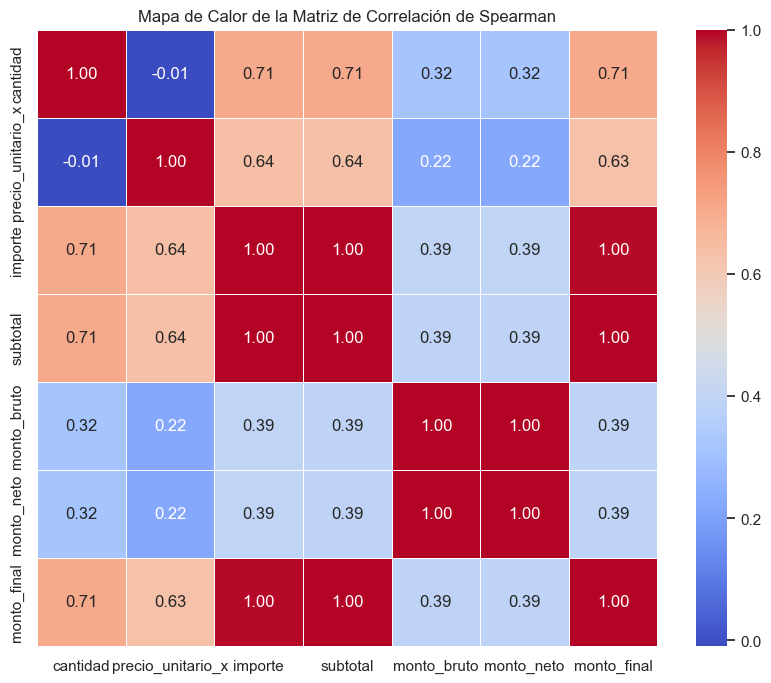

In [272]:
# Crear un mapa de calor (heatmap) de la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de la Matriz de Correlación de Spearman")
plt.show()

### Interpretación de la Matriz de Correlación de Spearman

En general, los coeficientes de Spearman tenderán a ser similares a los de Pearson si las relaciones son predominantemente lineales y no hay outliers extremos. Sin embargo, pueden diferir notablemente si hay fuertes relaciones monótonas que no son lineales, o si los outliers influyen en la correlación de Pearson.
Este análisis complementario con Spearman nos da una visión más completa y robusta de las asociaciones entre las variables numéricas, especialmente útil dado el sesgo y los posibles outliers que hemos identificado en pasos anteriores.

## **Comparación de los mapas de calor de Pearson y Spearman** ###

Al comparar la matriz de correlación de Spearman con la de Pearson, podemos observar si la presencia de outliers o la naturaleza no lineal de algunas relaciones afectó significativamente los coeficientes de correlación. En general, los coeficientes de Spearman tenderán a ser similares a los de Pearson si las relaciones son predominantemente lineales y no hay outliers extremos. Sin embargo, pueden diferir notablemente si hay fuertes relaciones monótonas que no son lineales, o si los outliers influyen en la correlación de Pearson.
Este análisis complementario nos da una visión más completa y robusta de las asociaciones entre las variables numéricas, especialmente útil dado el sesgo y los posibles outliers que hemos identificado en pasos anteriores.


***Consideraciones sobre outliers y sesgo en las correlaciones***

Al comparar los mapas de calor de Pearson y Spearman, podemos notar lo siguiente:

*   **Correlaciones fuertes (cercanas a 1 o -1):** Para las variables que ya mostraron una correlación de Pearson muy fuerte (por ejemplo, entre `importe`, `subtotal` y `monto_final`), los valores de Spearman son muy similares. Esto sugiere que estas relaciones son consistentemente fuertes y monótonas, y los outliers no afectan drásticamente su ordenamiento.
*   **Correlaciones moderadas:** Para correlaciones moderadas (como entre `cantidad` y las variables de monto, o entre `precio_unitario_x` y las variables de monto), los valores de Spearman también son bastante parecidos a los de Pearson, aunque puede haber ligeras variaciones. Esto indica que la relación monótona es similar a la relación lineal para la mayoría de los datos.
*   **Correlaciones débiles (cercanas a 0):** La correlación entre `cantidad` y `precio_unitario_x` sigue siendo muy cercana a 0 en Spearman (-0.0085), al igual que en Pearson (-0.0175). Esto refuerza la idea de que no hay una relación lineal o monótona significativa entre la cantidad de artículos comprados y su precio unitario en un detalle de venta.
*   **Impacto de Outliers/Sesgo:** Aunque las diferencias no son drásticas en este dataset particular para la mayoría de las variables (lo que podría sugerir que los outliers no son extremadamente influyentes en el ordenamiento de los rangos, o que las relaciones monótonas son bastante lineales), la correlación de Spearman es inherentemente más robusta ante la presencia de esos outliers y el sesgo que observamos en las distribuciones. Por lo tanto, los valores de Spearman pueden considerarse una representación más fiable de la asociación general entre las variables en presencia de datos no normales o con outliers.

En resumen, en este caso, los resultados de Pearson y Spearman son bastante consistentes, lo que es positivo. Sin embargo, si tuviéramos outliers más extremos o relaciones claramente no lineales, las diferencias serían más pronunciadas. La correlación de Spearman nos da confianza en que las asociaciones que observamos no están siendo indebidamente influenciadas por los valores extremos.

## 5: Detección de Outliers mediante Cuartiles y Rangos (Método IQR)

En esta fase, aplicaremos el método del rango intercuartílico (IQR) para identificar posibles outliers en algunas de las variables numéricas clave de `df_master`. Este método es menos sensible a los extremos que, por ejemplo, la detección basada en la desviación estándar.

### A: Cálculo de Cuartiles, IQR y Límites para Detección de Outliers

Calcularemos el primer cuartil (Q1), el tercer cuartil (Q3) y el rango intercuartílico (IQR) para la variable `monto_final`. Luego, definiremos los límites inferior y superior para identificar outliers.

In [273]:
# Seleccionar la variable para la detección de outliers (por ejemplo, 'monto_final')
variable_outliers = 'monto_final'

# Calcular el primer cuartil (Q1)
Q1 = df_master[variable_outliers].quantile(0.25)

# Calcular el tercer cuartil (Q3)
Q3 = df_master[variable_outliers].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para la detección de outliers
# Los outliers se consideran valores por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mostrar los valores calculados
print(f"Variable analizada: {variable_outliers}")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Límite Inferior para Outliers: {lower_bound:.2f}")
print(f"Límite Superior para Outliers: {upper_bound:.2f}")

Variable analizada: monto_final
Q1: 39.06
Q3: 119.04
IQR: 79.98
Límite Inferior para Outliers: -80.91
Límite Superior para Outliers: 239.00


### Identificación y Visualización de Outliers

Ahora, identificaremos las filas en `df_master` que contienen outliers según los límites calculados y mostraremos estos outliers. También podemos visualizar su posición en un box plot, tomando como ejemplo la variable `monto_final`, evaluada en la sección anterior.


Número de outliers detectados en 'monto_final': 8

Outliers detectados en 'monto_final':


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final
208,75,2,Pepsi 1.5L,5,49.73,248.65,0,248.65,Pepsi 1.5L,Bebidas,49.73,Gaseosas,2023-03-17,34,3,14,3,Bruno Castro,bruno.castro2@mail.com,qr,OK,447.21,447.21,Bruno Castro,bruno.castro2@mail.com,Villa Maria,2023-02-03,F,56+,True,Tienda Aurelion - Córdoba,Cordoba,Cordoba,Vendedor 14,3,2022-04-15,True,qr,2023,3,Friday,0.0,248.65
1585,108,3,Sprite 1.5L,5,49.64,248.20,0,248.20,Sprite 1.5L,Bebidas,49.64,Gaseosas,2023-04-28,100,6,1,2,Agustina Lopez,agustina.lopez@mail.com,tarjeta,OK,364.28,364.28,Agustina Lopez,agustina.lopez@mail.com,Cordoba,2023-04-10,M,26-40,True,Tienda Aurelion - Mendiolaza,Mendiolaza,Cordoba,Vendedor 01,6,2022-04-25,True,tarjeta,2023,4,Friday,0.0,248.20
1655,222,10,Yerba Mate Intensa 1kg,5,48.83,244.15,0,244.15,Yerba Mate Intensa 1kg,Infusiones,48.83,Yerba Mate,2023-07-27,18,6,2,4,Ivana Torres,ivana.torres@mail.com,transferencia,OK,287.14,287.14,Ivana Torres,ivana.torres@mail.com,Carlos Paz,2023-01-18,M,26-40,True,Tienda Aurelion - Mendiolaza,Mendiolaza,Cordoba,Vendedor 02,6,2022-10-09,True,transferencia,2023,7,Thursday,0.0,244.15
1743,432,10,Yerba Mate Intensa 1kg,5,48.83,244.15,0,244.15,Yerba Mate Intensa 1kg,Infusiones,48.83,Yerba Mate,2024-01-12,59,2,12,1,Emilia Ruiz,emilia.ruiz@mail.com,efectivo,OK,409.72,409.72,Emilia Ruiz,emilia.ruiz@mail.com,Villa Maria,2023-02-28,F,18-25,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,efectivo,2024,1,Friday,0.0,244.15
1761,600,3,Sprite 1.5L,5,49.64,248.20,0,248.20,Sprite 1.5L,Bebidas,49.64,Gaseosas,2024-04-26,56,4,15,1,Bruno Diaz,bruno.diaz@mail.com,efectivo,OK,391.94,391.94,Bruno Diaz,bruno.diaz@mail.com,Rio Cuarto,2023-02-25,M,18-25,True,Tienda Aurelion - Villa María,Villa Maria,Cordoba,Vendedor 15,4,2022-04-10,True,efectivo,2024,4,Friday,0.0,248.20


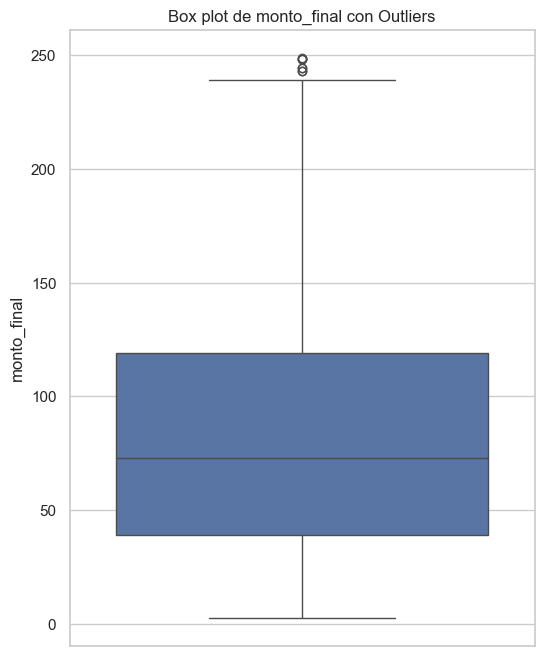

In [274]:
# Identificar los outliers
outliers = df_master[(df_master[variable_outliers] < lower_bound) | (df_master[variable_outliers] > upper_bound)]

# Mostrar el número de outliers encontrados
print(f"\nNúmero de outliers detectados en '{variable_outliers}': {len(outliers)}")

# Mostrar los outliers (primeras filas si hay muchos)
print(f"\nOutliers detectados en '{variable_outliers}':")
if not outliers.empty:
    display(outliers.head()) # Mostrar solo las primeras filas de outliers
else:
    print("No se detectaron outliers según el método IQR.")
print("\n")
# Visualizar los outliers en un box plot para la variable analizada
plt.figure(figsize=(6, 8))
sns.boxplot(y=df_master[variable_outliers])
plt.title(f'Box plot de {variable_outliers} con Outliers')
plt.show()



### Aplicamos el método IQR en `df_master`:

In [275]:
# Lista de variables numéricas
vars_numericas = [
    'cantidad', 'precio_unitario_x', 'importe', 'subtotal',
    'monto_bruto', 'monto_neto', 'monto_final', 'descuento_aplicado_pct'
]

# Lista para almacenar resultados
resultados = []

total_registros = len(df_master)

# Calcular outliers por IQR
for col in vars_numericas:
    Q1 = df_master[col].quantile(0.25)
    Q3 = df_master[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df_master[col] < lower) | (df_master[col] > upper)).sum()
    porcentaje = (outlier_count / total_registros) * 100

    resultados.append([col, Q1, Q3, IQR, lower, upper, outlier_count, porcentaje])

# Crear DataFrame resumen
tabla_outliers = pd.DataFrame(resultados, columns=[
    "Variable", "Q1", "Q3", "IQR", "Límite Inf.", "Límite Sup.",
    "Outliers", "% Outliers"
])

# Redondeo para estética
tabla_outliers = tabla_outliers.round({
    "Q1": 2, "Q3": 2, "IQR": 2,
    "Límite Inf.": 2, "Límite Sup.": 2,
    "% Outliers": 2
})

# Mostrar tabla completa
pd.set_option('display.max_rows', None)
display(tabla_outliers)

# Exportar, descomentar si es necesario
#tabla_outliers.to_excel("outliers_IQR_df_master.xlsx", index=False)


,Variable,Q1,Q3,IQR,Límite Inf.,Límite Sup.,Outliers,% Outliers
0,cantidad,2.00,4.00,2.00,-1.00,7.00,0,0.00
1,precio_unitario_x,20.69,42.86,22.17,-12.56,76.11,0,0.00
2,importe,40.40,121.44,81.04,-81.17,243.00,8,0.40
3,subtotal,39.62,120.56,80.94,-81.79,241.97,8,0.40
4,monto_bruto,170.80,375.72,204.92,-136.58,683.10,10,0.50
5,monto_neto,170.80,375.72,204.92,-136.58,683.10,10,0.50
6,monto_final,39.06,119.04,79.98,-80.91,239.00,8,0.40
7,descuento_aplicado_pct,0.00,0.00,0.00,0.00,0.00,307,15.23


### Interpretación de los Resultados:

* **`cantidad`**:
  No se detectaron outliers en esta variable. Los valores están dentro de un rango esperado, lo que indica que la cantidad de productos vendidos es coherente y no presenta valores extremos.

* **`precio_unitario_x`**:
  Al igual que en `cantidad`, no se detectaron outliers en el precio unitario. Esto sugiere que los precios de los productos vendidos están dentro de los límites razonables y no hay precios inusualmente bajos o altos.

* **`importe` y `subtotal`**:
  Se detectaron 8 outliers en ambas variables. Los valores atípicos se encuentran por encima de los límites establecidos, lo que podría indicar transacciones con valores excepcionales (por ejemplo, ventas grandes o errores en el cálculo). Sería prudente revisar estas transacciones para asegurarse de que son legítimas.

* **`monto_bruto` y `monto_neto`**:
  Estas dos variables presentan 10 outliers, que podrían ser transacciones con grandes volúmenes o descuentos aplicados, o errores de datos. Similar a los anteriores, se recomienda revisar estos registros para asegurar que no haya datos incorrectos.

* **`monto_final`**:
  Se detectaron 8 outliers, lo que podría estar relacionado con transacciones con valores significativamente más altos o bajos que los demás. Esto podría deberse a ventas excepcionales o errores de entrada. Se recomienda investigar estas transacciones para determinar si son válidas o necesitan ser corregidas.

* **`descuento_aplicado_pct`**:
  Esta variable tiene un número muy alto de outliers (307), lo cual es inusual. Sin embargo, dado que el **rango intercuartílico (IQR)** es 0, y los valores de descuento aplicados son extremadamente pequeños (casi siempre 0), es probable que los "outliers" en este caso representen registros donde los descuentos fueron aplicados en promociones especiales.Este tipo de variabilidad es importante revisar, pero podría considerarse normal si los descuentos son muy poco frecuentes o si la política de descuentos tiene cambios inesperados.

En general, los outliers no necesariamente indican errores, sino que podrían representar casos excepcionales que podrían ser relevantes para el análisis de ventas o políticas de descuento. Es recomendable investigar estos casos para entender si son datos válidos o si necesitan ser corregidos.


## B: Detección de outliers usando método IQR y Z-score
En esta sección, se utiliza los métodos del rango intercuartílico (IQR) y Z-score para detectar valores atípicos (outliers) en las variables numéricas del `df_master`. Estos métodos ayudan a identificar datos extremos que podrían representar errores o transacciones excepcionales.
* IQR es útil para detectar outliers en distribuciones no normales, o cuando hay datos con colas largas. Sin embargo, puede ser más rígido en su definición de lo que es un outlier, ya que se basa en cuartiles y no en la variabilidad global de los datos.

* Z-score es más adecuado para distribuciones normales y detecta outliers basándose en la variabilidad general (desviación estándar). Este método puede pasar por alto outliers en distribuciones sesgadas o no normales, pero es excelente para detectar puntos extremos en datos simétricos.

Los resultados se presentan en términos de la cantidad de outliers detectados por cada método y el porcentaje de outliers en relación con el total de datos.



In [276]:
# Detección de outliers
from scipy import stats # Importar stats para Z-score

def detectar_outliers_avanzado(df, columna):
    """Detecta outliers usando método IQR y Z-score"""
    # Asegurarse de que la columna sea numérica
    if pd.api.types.is_numeric_dtype(df[columna]):
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Método IQR
        outliers_iqr = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]

        # Método Z-score
        # Calcular Z-scores solo si hay datos no nulos y más de un valor único
        if df[columna].dropna().nunique() > 1:
            z_scores = np.abs(stats.zscore(df[columna].dropna()))
            outliers_z = df[columna].dropna()[z_scores > 3]
            return len(outliers_iqr), len(outliers_z)
        else:
            # No se puede calcular Z-score si no hay variabilidad o datos suficientes
            return len(outliers_iqr), 0 # Retorna 0 para Z-score si no es aplicable
    else:
        # Si la columna no es numérica, no se detectan outliers numéricos
        return 0, 0 # Retorna 0 para ambos métodos si la columna no es numérica


print("\n DETECCIÓN DE OUTLIERS")
print("="*70)
# Definir las variables numéricas relevantes del df_master
vars_numericas = ['cantidad', 'precio_unitario_x', 'importe', 'subtotal', 'monto_bruto', 'monto_neto', 'monto_final', 'descuento_aplicado_pct'] # Agregamos descuento_aplicado_pct para detección de outliers

print(f"{'Variable':<25} {'IQR Count':<15} {'Z-score Count (|z|>3)':<25} {'% Outliers (IQR)'}")
print("-"*80)

for var in vars_numericas:
    iqr_count, z_count = detectar_outliers_avanzado(df_master, var) # Usar df_master
    if len(df_master) > 0: # Evitar división por cero
        pct = (iqr_count / len(df_master)) * 100
    else:
        pct = 0
    print(f"{var:<25} {iqr_count:<15} {z_count:<25} {pct:.2f}%")

print("\n Los outliers pueden indicar transacciones excepcionales o errores de datos")


 DETECCIÓN DE OUTLIERS
Variable                  IQR Count       Z-score Count (|z|>3)     % Outliers (IQR)
--------------------------------------------------------------------------------
cantidad                  0               0                         0.00%
precio_unitario_x         0               0                         0.00%
importe                   8               6                         0.40%
subtotal                  8               4                         0.40%
monto_bruto               10              10                        0.50%
monto_neto                10              10                        0.50%
monto_final               8               6                         0.40%
descuento_aplicado_pct    307             40                        15.23%

 Los outliers pueden indicar transacciones excepcionales o errores de datos


### Interpretación de la Detección de Outliers

La detección de outliers nos muestra que:

*   **Variables Monetarias (`importe`, `subtotal`, `monto_final`, `monto_bruto`, `monto_neto`):** Se identificaron un pequeño número de outliers (entre 6 y 10 dependiendo del método y la variable). Estos representan transacciones o detalles de venta con valores significativamente más altos que la mayoría, lo cual es consistente con el sesgo positivo observado.
*   **`cantidad` y `precio_unitario_x`:** No se detectaron outliers significativos, indicando consistencia en estos valores.
*   **`descuento_aplicado_pct`:** La alta cantidad de "outliers" por el método IQR (15.23%) confirma que los descuentos son poco frecuentes y se aplican en porcentajes específicos (5%, 10%, 15%) que son atípicos en comparación con la mayoría de los valores que son 0.

En general, la presencia de outliers en los montos resalta transacciones de alto valor que podrían requerir análisis adicional, mientras que en el descuento solo confirma su baja frecuencia.

## Interpretación de Resultados de Detección de Outliers

Se realizaron dos métodos de detección de outliers: **IQR (Rango Intercuartílico)** y **IQR combinado con Z-score**. A continuación se detallan las observaciones clave de ambos enfoques:

### 1. **Resultados con IQR:**
   - **IQR** identificó outliers en varias variables como **importe**, **subtotal**, **monto_bruto**, **monto_neto**, **monto_final**, y especialmente en **descuento_aplicado_pct**.
   - Las variables **cantidad** y **precio_unitario_x** no presentan outliers según este método, lo que sugiere que no hay transacciones inusuales en cuanto a la cantidad de productos vendidos o su precio unitario.
   - En general, **IQR** detectó un 0.4% a 0.5% de outliers en las transacciones, con una excepción notable en **descuento_aplicado_pct**, que presentó un 15.23% de outliers debido a la gran cantidad de transacciones con descuento igual a 0.

### 2. **Resultados con IQR + Z-score:**
   - **Z-score** redujo el número de outliers en comparación con **IQR**. Esto es esperable, ya que el **Z-score** detecta valores que se desvían significativamente de la media, por lo que es más estricto en la detección de valores atípicos extremos.
   - En el caso de **descuento_aplicado_pct**, **Z-score** encontró menos outliers (40 vs 307), lo que indica que la mayoría de los registros con descuento igual a 0 no son tan extremos si se consideran en relación con la media.
   - Aunque las **variables** como **monto_bruto**, **monto_neto**, **monto_final** y **importe** siguen mostrando una cantidad razonable de outliers, los resultados con **Z-score** son más consistentes en términos de transacciones inusuales en comparación con **IQR**.

### Conclusión:
- **IQR** es más sensible a los valores fuera de los cuartiles y puede identificar un mayor número de outliers, especialmente cuando hay una distribución de valores muy concentrada en torno a un valor (como en **descuento_aplicado_pct**).
- **Z-score** proporciona un análisis más riguroso para detectar los valores atípicos extremos basados en la desviación de la media. Es útil para filtrar los outliers más distantes, pero puede no identificar valores atípicos menos extremos que **IQR** sí podría captar.
- Ambos métodos son complementarios y deberían ser utilizados juntos para obtener una visión más completa de los outliers y evaluar la calidad de los datos.


- **Recomendación:** Se recomienda realizar un análisis adicional para entender mejor las transacciones con outliers, especialmente en lo que respecta a los descuentos aplicados, y evaluar si estos resultados son una representación precisa de las políticas de descuentos o si deben ajustarse.





## Aplicación de Intervalos de Confianza (95%)

Calculamos los intervalos de confianza al 95% para varias métricas clave de ventas, lo que significa que hay un 95% de certeza de que el valor real se encuentra dentro del intervalo estimado. El cálculo se realiza utilizando el **error estándar de la media** y la **distribución t** de Student, ya que estamos trabajando con una muestra y no con toda la población.

In [277]:
# Intervalos de confianza (95%)
from scipy import stats # Asegurarse de que stats esté importado

def intervalo_confianza(data, confidence=0.95):
    """Calcula intervalo de confianza"""
    n = len(data)
    if n == 0:
        return np.nan, np.nan, np.nan # Manejar caso de datos vacíos
    mean = np.mean(data)
    se = stats.sem(data)
    # Asegurarse de que los grados de libertad son válidos
    degrees_freedom = n - 1
    if degrees_freedom <= 0:
         return mean, np.nan, np.nan # No se puede calcular IC con 1 o 0 puntos de datos

    margin = se * stats.t.ppf((1 + confidence) / 2, degrees_freedom)
    return mean, mean - margin, mean + margin

print("\nINTERVALOS DE CONFIANZA (95%)")
print("="*70)
# Ajuste el ancho del encabezado para que coincida con el nuevo formato de datos
print(f"{'Métrica':<17} {'Media':>15} {'IC Inferior':>13} {'IC Superior':>13}")
print("-"*70)

# Usar df_master y variables numéricas relevantes
metricas_ic = {
    'Importe por detalle': df_master['importe'], # Usar importe de detalle
    'Cantidad por detalle': df_master['cantidad'], # Usar cantidad de detalle
    'Precio unitario': df_master['precio_unitario_x'], # Usar precio_unitario_x de detalle
    'Monto final por detalle': df_master['monto_final'], # Usar monto_final de detalle
    'Monto bruto por venta': df_master['monto_bruto'], # Usar monto_bruto de venta
    'Monto neto por venta': df_master['monto_neto'] # Usar monto_neto de venta
}

for nombre, data in metricas_ic.items():
    # Asegurarse de que los datos son numéricos antes de calcular
    if pd.api.types.is_numeric_dtype(data):
        mean, lower, upper = intervalo_confianza(data.dropna()) # Aplicar dropna() por si acaso
        if not np.isnan(mean): # Solo imprimir si el cálculo fue exitoso
             # Formato ajustado para usar 7.2f y el signo $
             print(f"{nombre:<25}  ${mean:>7.2f}    ${lower:>7.2f}    ${upper:>7.2f}")
        else:
             print(f"{nombre:<25} {'N/A':>10} {'N/A':>10} {'N/A':>10}")

    else:
        print(f"{nombre:<20} {'No Numérica':>15} {'N/A':>13} {'N/A':>13}")





INTERVALOS DE CONFIANZA (95%)
Métrica                     Media   IC Inferior   IC Superior
----------------------------------------------------------------------
Importe por detalle        $  83.86    $  81.48    $  86.24
Cantidad por detalle       $   2.68    $   2.62    $   2.73
Precio unitario            $  31.45    $  30.89    $  32.01
Monto final por detalle    $  82.06    $  79.71    $  84.41
Monto bruto por venta      $ 279.66    $ 273.28    $ 286.04
Monto neto por venta       $ 279.66    $ 273.28    $ 286.04


### Interpretación de los Resultados de Intervalos de Confianza (95%)

Los intervalos de confianza del 95% calculados nos dan un rango estimado para la verdadera media poblacional de cada métrica, basándonos en nuestros datos. Los límites del intervalo están en la misma unidad que la métrica analizada (monetaria o cantidad de unidades), y el 95% se refiere a la confianza en que la verdadera media de la población se encuentra dentro de ese rango.

Aquí está la interpretación de los resultados específicos:

*   **Importe por detalle:** Con 95% de confianza, el importe promedio por cada línea de producto vendida en la población está entre **$81.48  y  $86.24**.
*   **Cantidad por detalle:** Con 95% de confianza, la cantidad promedio de productos por línea de venta en la población está entre **2.62 y 2.73 unidades**.
*   **Precio unitario:** Con 95% de confianza, el precio unitario promedio de los productos vendidos en la población está entre **$30.89 y $32.01**.
*   **Monto final por detalle:** Con 95% de confianza, el monto final promedio por cada línea de producto (después de descuentos) en la población está entre **$79.71 y $84.41**.
*   **Monto bruto por venta:** Con 95% de confianza, el monto bruto promedio por venta total en la población está entre **$273.28 y $286.04**.
*   **Monto neto por venta:** Con 95% de confianza, el monto neto promedio por venta total en la población está entre **$273.28 y $286.04**.

Esta interpretación nos ayuda a entender la precisión de nuestras estimaciones de la media para estas métricas clave y proporciona un rango plausible para los valores promedio a nivel de población.

## Aplicación de Segmentación de Clientes por Recencia, Frecuencia y Valor Monetario

### ANÁLISIS RFM DE CLIENTES


In [278]:
# Análisis RFM (Recencia, Frecuencia, Valor Monetario)
# Definimos la fecha de referencia como el día siguiente a la última fecha de venta
fecha_referencia = df_master['fecha'].max() + pd.Timedelta(days=1)

# Agrupamos por cliente para calcular las métricas RFM
rfm = df_master.groupby('id_cliente').agg({
    'fecha': lambda x: (fecha_referencia - x.max()).days,  # Recencia: Días desde la última compra
    'id_venta': 'nunique',  # Frecuencia: Número de ventas únicas por cliente
    'monto_final': 'sum'  # Valor Monetario: Suma del monto final (con descuento) por cliente
}).rename(columns={
    'fecha': 'Recencia',
    'id_venta': 'Frecuencia',
    'monto_final': 'Valor_Monetario'
})

# Calculamos las puntuaciones RFM (cuantiles 1-5, donde 5 es la mejor puntuación)
rfm['R_Score'] = pd.qcut(rfm['Recencia'], 5, labels=[5,4,3,2,1], duplicates='drop') # Recencia: menores días = mejor puntuación
rfm['F_Score'] = pd.qcut(rfm['Frecuencia'].rank(method='first'), 5, labels=[1,2,3,4,5], duplicates='drop') # Frecuencia: mayor número de ventas = mejor puntuación
rfm['M_Score'] = pd.qcut(rfm['Valor_Monetario'], 5, labels=[1,2,3,4,5], duplicates='drop') # Valor Monetario: mayor gasto = mejor puntuación

# Creamos un score RFM combinado (concatenando las puntuaciones)
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
# Calculamos un score RFM total (sumando las puntuaciones)
rfm['RFM_Total'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

# Segmentación de clientes basada en el score RFM total
def segmentar_rfm(score):
    if score >= 13:
        return 'Champions' # Clientes de mayor valor y más recientes
    elif score >= 10:
        return 'Loyal' # Clientes frecuentes y que gastan bien
    elif score >= 7:
        return 'Potential' # Clientes con potencial para ser leales
    elif score >= 5:
        return 'At Risk' # Clientes que están dejando de comprar
    else:
        return 'Lost' # Clientes que ya no compran

# Aplicamos la función de segmentación
rfm['Segmento'] = rfm['RFM_Total'].apply(segmentar_rfm)

# Imprimimos los resultados del análisis RFM
print("\nANÁLISIS RFM DE CLIENTES")
print("="*70)
print("\nEstadísticas RFM:")
display(rfm[['Recencia', 'Frecuencia', 'Valor_Monetario']].describe().round(2))

print("\nDistribución de Segmentos:")
segmentos = rfm['Segmento'].value_counts()
# Imprimimos el conteo y porcentaje de clientes por segmento
for segmento, count in segmentos.items():
    pct = (count / len(rfm)) * 100
    print(f"  {segmento:<15} {count:>3} clientes ({pct:>5.1f}%)")

print("\nValor por Segmento:")
# Calculamos el valor total, promedio y conteo por segmento
valor_segmento = rfm.groupby('Segmento')['Valor_Monetario'].agg(['sum', 'mean', 'count'])
# Calculamos el porcentaje del valor monetario total que representa cada segmento
valor_segmento['% del Total'] = (valor_segmento['sum'] / valor_segmento['sum'].sum() * 100)
display(valor_segmento.round(2))


ANÁLISIS RFM DE CLIENTES

Estadísticas RFM:


,Recencia,Frecuencia,Valor_Monetario
count,99.00,99.00,99.00
mean,68.64,7.27,1671.11
std,72.39,6.18,1435.00
min,1.00,1.00,29.93
25%,15.00,3.00,740.82
50%,44.00,5.00,1212.35
75%,98.00,8.00,2021.44
max,368.00,26.00,5530.67



Distribución de Segmentos:
  Champions        24 clientes ( 24.2%)
  Loyal            23 clientes ( 23.2%)
  Potential        21 clientes ( 21.2%)
  Lost             16 clientes ( 16.2%)
  At Risk          15 clientes ( 15.2%)

Valor por Segmento:


,sum,mean,count,% del Total
Segmento,,,,
At Risk,10583.85,705.59,15,6.40
Champions,91078.86,3794.95,24,55.05
Lost,6937.50,433.59,16,4.19
Loyal,34074.97,1481.52,23,20.60
Potential,22764.99,1084.05,21,13.76


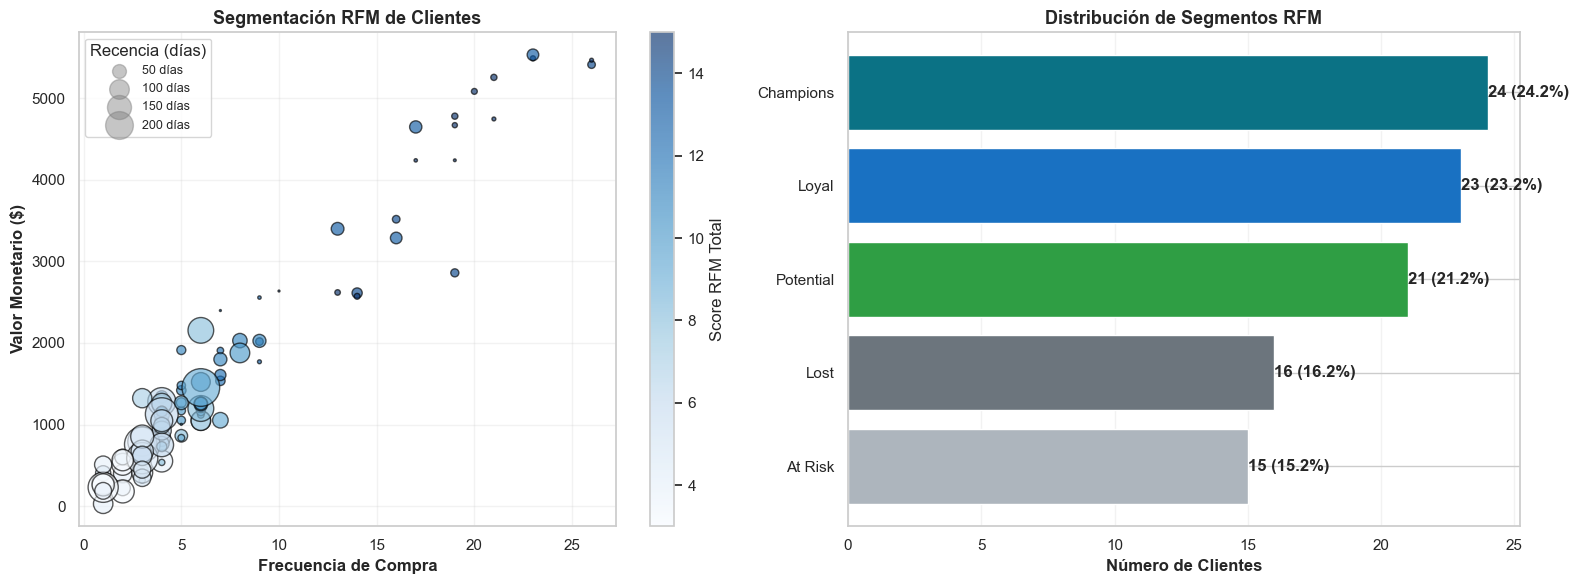


 ESTRATEGIAS POR SEGMENTO:
  Champions: Recompensar, pedir referidos, productos premium
  Loyal: Up-sell, programas de fidelización
  Potential: Ofertas personalizadas, reactivación
  At Risk: Campaña de retención urgente
  Lost: Campaña de reconquista agresiva


In [279]:
# Visualización de segmentos RFM - versión formal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Scatter 2D formal
scatter = ax1.scatter(
    rfm['Frecuencia'], rfm['Valor_Monetario'],
    c=rfm['RFM_Total'], 
    s=rfm['Recencia']*2, 
    cmap='Blues', alpha=0.65, edgecolors='black'
)

ax1.set_xlabel('Frecuencia de Compra', fontweight='bold')
ax1.set_ylabel('Valor Monetario ($)', fontweight='bold')
ax1.set_title('Segmentación RFM de Clientes', fontweight='bold', fontsize=13)
plt.colorbar(scatter, ax=ax1, label='Score RFM Total')
ax1.grid(alpha=0.25)

# Leyenda de tamaño
for rec in [50, 100, 150, 200]:
    ax1.scatter([], [], s=rec*2, c='gray', alpha=0.45, label=f'{rec} días')
ax1.legend(title='Recencia (días)', loc='upper left', fontsize=9)

# Paleta formal para segmentos
colors_seg = {
    'Champions': '#0B7285',     # Azul petróleo
    'Loyal': '#1971C2',        # Azul formal
    'Potential': '#2F9E44',    # Verde sobrio
    'At Risk': '#ADB5BD',      # Gris medio
    'Lost': '#6C757D'          # Gris oscuro
}

segmentos_count = rfm['Segmento'].value_counts().sort_values(ascending=True)
bar_colors = [colors_seg.get(seg, '#5C636A') for seg in segmentos_count.index]

# Gráfico de barras horizontal
bars = ax2.barh(segmentos_count.index, segmentos_count.values, color=bar_colors)
ax2.set_xlabel('Número de Clientes', fontweight='bold')
ax2.set_title('Distribución de Segmentos RFM', fontweight='bold', fontsize=13)
ax2.grid(axis='x', alpha=0.25)

for bar in bars:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height()/2,
             f'{int(width)} ({width/len(rfm)*100:.1f}%)',
             va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.savefig('viz_rfm_formal.png', dpi=300, bbox_inches='tight')
plt.show()

# Estrategias
print("\n ESTRATEGIAS POR SEGMENTO:")
estrategias = {
    'Champions': 'Recompensar, pedir referidos, productos premium',
    'Loyal': 'Up-sell, programas de fidelización',
    'Potential': 'Ofertas personalizadas, reactivación',
    'At Risk': 'Campaña de retención urgente',
    'Lost': 'Campaña de reconquista agresiva'
}
for seg, estrategia in estrategias.items():
    if seg in rfm['Segmento'].values:
        print(f"  {seg}: {estrategia}")


### Interpretación General del Análisis RFM

El análisis RFM nos ha permitido segmentar la base de clientes en grupos con comportamientos de compra similares, revelando información valiosa:

*   **Segmentos de Alto Valor (Champions y Loyal)**: Estos segmentos, a pesar de no ser la mayoría en número, representan una proporción significativa del valor monetario total generado. Los "Champions" son los clientes más recientes, frecuentes y que más gastan, siendo vitales para el negocio. Los "Loyal" son clientes habituales y confiables.
*   **Segmentos con Potencial (Potential)**: Este grupo muestra características que podrían desarrollarse hacia la lealtad con estrategias adecuadas.
*   **Segmentos en Riesgo (At Risk y Lost)**: Estos segmentos, especialmente "Lost", requieren atención para identificar las razones de su disminución o cese de actividad y explorar posibilidades de reactivación.

Comprender el tamaño y el valor de cada segmento es fundamental para dirigir esfuerzos de marketing y retención de manera efectiva, maximizando el retorno de la inversión.

### Análisis de Ingresos por Producto

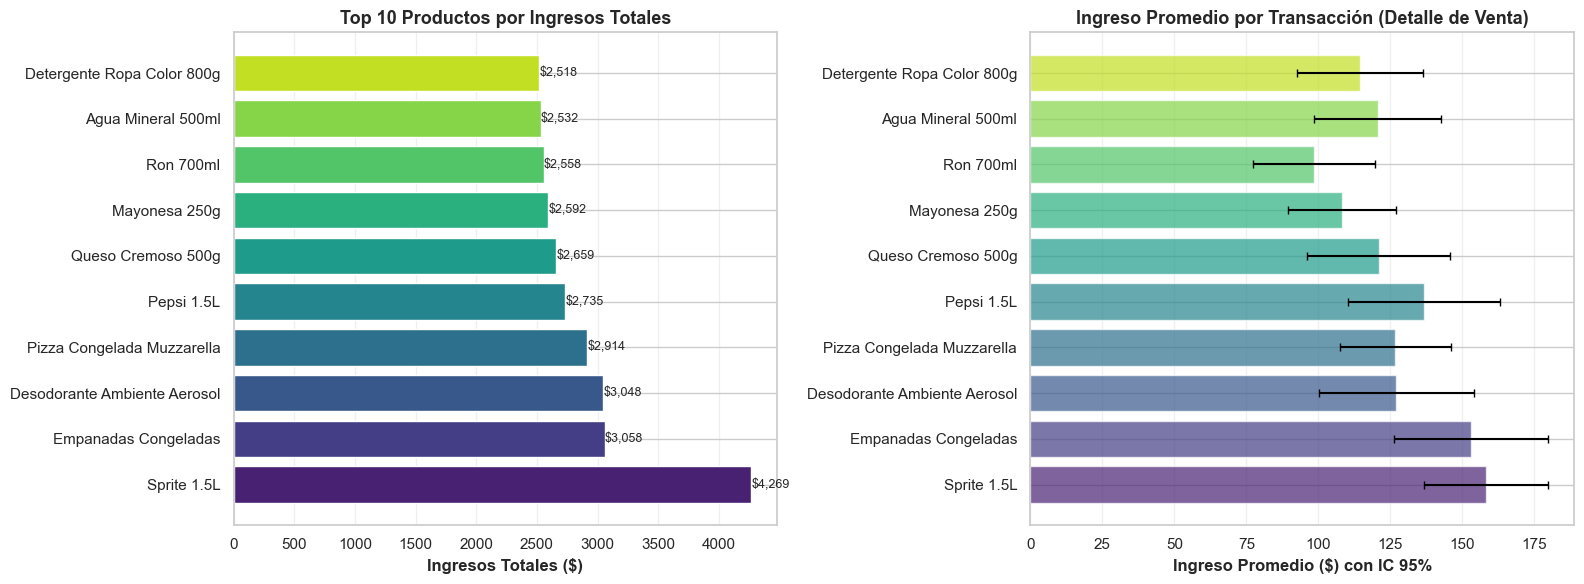


ANÁLISIS DEL PRODUCTO LÍDER POR INGRESOS:
Producto líder: Sprite 1.5L
  Ingresos totales: $4,269.04
  Ingreso promedio por transacción: $158.11
  IC 95% para Ingreso Promedio: [$136.68, $179.55]


In [280]:
# Análisis de Ingresos por Producto
# Top 10 productos con intervalos de confianza
# Agrupar por nombre_producto y calcular estadísticas relevantes del importe
top_productos_analisis = df_master.groupby('nombre_producto_x').agg({
    'importe': ['sum', 'mean', 'std', 'count']
}).reset_index()

# Renombrar columnas para mayor claridad
top_productos_analisis.columns = ['producto', 'total_ingresos', 'media_ingresos', 'std_ingresos', 'n_transacciones']

# Seleccionar los 10 productos con mayores ingresos totales
top_productos_analisis = top_productos_analisis.nlargest(10, 'total_ingresos')

# Calcular intervalos de confianza del 95% para la media de ingresos
# Usamos 1.96 para el 95% de confianza en una distribución normal (aproximado para n > 30)
top_productos_analisis['ic_lower'] = top_productos_analisis['media_ingresos'] - 1.96 * (top_productos_analisis['std_ingresos'] / np.sqrt(top_productos_analisis['n_transacciones']))
top_productos_analisis['ic_upper'] = top_productos_analisis['media_ingresos'] + 1.96 * (top_productos_analisis['std_ingresos'] / np.sqrt(top_productos_analisis['n_transacciones']))

# Visualización de los resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Ingresos totales por producto
colors = sns.color_palette('viridis', 10) # Paleta de colores
bars = ax1.barh(top_productos_analisis['producto'], top_productos_analisis['total_ingresos'], color=colors)
ax1.set_xlabel('Ingresos Totales ($)', fontweight='bold')
ax1.set_title('Top 10 Productos por Ingresos Totales', fontweight='bold', fontsize=13)
ax1.grid(axis='x', alpha=0.3)

# Añadir etiquetas de valor a las barras
for i, bar in enumerate(bars):
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'${bar.get_width():,.0f}', va='center', ha='left', fontsize=9)

# Gráfico 2: Ingresos promedio con IC 95%
ax2.barh(top_productos_analisis['producto'], top_productos_analisis['media_ingresos'], color=colors, alpha=0.7)
# Añadir barras de error para el intervalo de confianza
ax2.errorbar(top_productos_analisis['media_ingresos'], range(len(top_productos_analisis)),
             xerr=[top_productos_analisis['media_ingresos'] - top_productos_analisis['ic_lower'],
                   top_productos_analisis['ic_upper'] - top_productos_analisis['media_ingresos']],
             fmt='none', ecolor='black', capsize=3)
ax2.set_xlabel('Ingreso Promedio ($) con IC 95%', fontweight='bold')
ax2.set_title('Ingreso Promedio por Transacción (Detalle de Venta)', fontweight='bold', fontsize=13)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout() # Ajustar diseño para evitar solapamiento
plt.savefig('viz_productos_avanzado.png', dpi=300, bbox_inches='tight') # Guardar figura
plt.show() # Mostrar figura

# Imprimir análisis clave del producto líder
print("\nANÁLISIS DEL PRODUCTO LÍDER POR INGRESOS:")
# Asegurarse de que el DataFrame no esté vacío antes de intentar acceder a la primera fila
if not top_productos_analisis.empty:
    producto_lider = top_productos_analisis.iloc[0]
    print(f"Producto líder: {producto_lider['producto']}")
    print(f"  Ingresos totales: ${producto_lider['total_ingresos']:,.2f}")
    print(f"  Ingreso promedio por transacción: ${producto_lider['media_ingresos']:,.2f}")
    # Verificar si los límites del IC no son NaN antes de imprimir
    if not np.isnan(producto_lider['ic_lower']) and not np.isnan(producto_lider['ic_upper']):
         print(f"  IC 95% para Ingreso Promedio: [${producto_lider['ic_lower']:,.2f}, ${producto_lider['ic_upper']:,.2f}]")
    else:
        print("  IC 95% para Ingreso Promedio: No se pudo calcular (posiblemente pocos datos)")
else:
    print("No hay datos de productos para analizar.")

### Interpretación Concisa del Análisis de Ingresos por Producto

El análisis de ingresos por producto identifica a los productos que más contribuyen a los ingresos totales del negocio. Los productos con mayores ingresos son:

*   **Sprite 1.5L**: $ 4,269.04

*   **Empanadas Congeladas**: $ 3,057.92

*   **Desodorante Ambiente Aerosol**: $ 3,048.50

*   **Pizza Congelada Muzzarella**: $ 2,914.48

*   **Pepsi 1.5L**: $ 2,735.15

Estos productos son cruciales para la generación de ingresos y deben ser considerados en las estrategias de inventario, marketing y ventas.




## Análisis Temporal con descompisición en ventas

C:\Users\KEILY\AppData\Local\Temp\ipykernel_12344\2481037110.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_master, x='año_mes', y='importe', order=orden_año_mes,


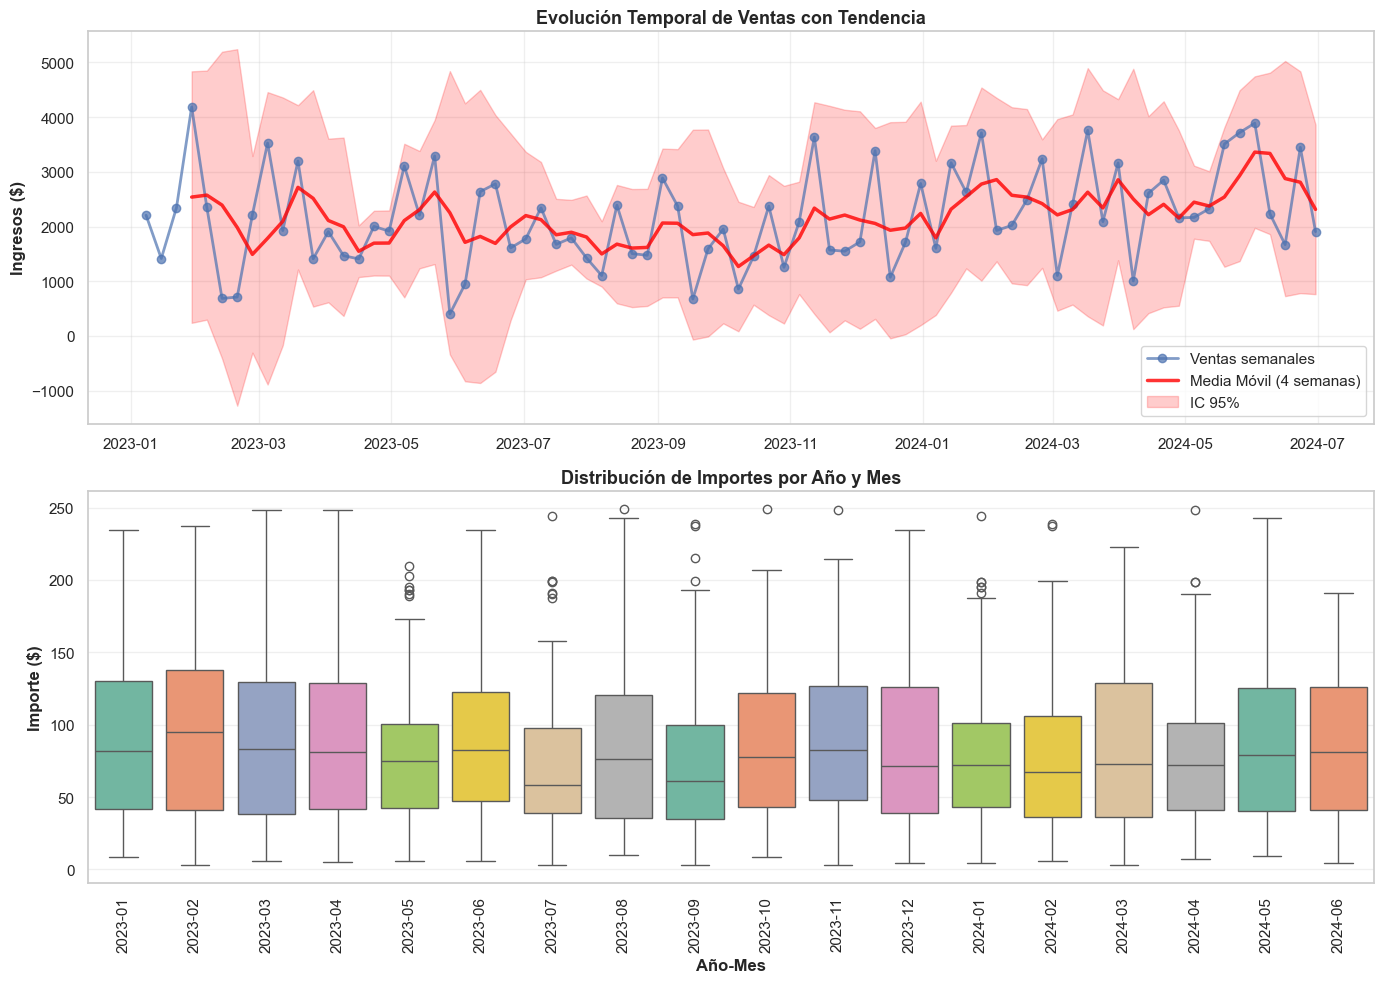


 Test de Kruskal-Wallis (diferencias entre Año-Mes):
H = 18.0162, p-value = 0.387822
Conclusión: No hay diferencias significativas entre Año-Mes (p < 0.05)


In [281]:
# Análisis Temporal con descomposición en ventas
# Agrupar por fecha y sumar el importe para obtener ventas diarias
ventas_tiempo = df_master.groupby('fecha')['importe'].sum().sort_index()
# Agrupar por semana
ventas_tiempo = ventas_tiempo.resample('W').sum()

# Crear subplots para los gráficos
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Serie temporal con tendencia y bandas de confianza
axes[0].plot(ventas_tiempo.index, ventas_tiempo.values,
             marker='o', linewidth=2, markersize=6, alpha=0.7, label='Ventas semanales')

# Añadir media móvil de 4 semanas para la tendencia
ma_4 = ventas_tiempo.rolling(window=4).mean()
axes[0].plot(ma_4.index, ma_4.values,
             color='red', linewidth=2.5, label='Media Móvil (4 semanas)', alpha=0.8)

# Añadir bandas de confianza (usando 1.96 para el 95% de confianza)
std_4 = ventas_tiempo.rolling(window=4).std()
axes[0].fill_between(ma_4.index, ma_4 - 1.96*std_4, ma_4 + 1.96*std_4,
                      alpha=0.2, color='red', label='IC 95%')

axes[0].set_ylabel('Ingresos ($)', fontweight='bold')
axes[0].set_title('Evolución Temporal de Ventas con Tendencia', fontweight='bold', fontsize=13)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Gráfico 2: Box plot por año y mes para visualizar la distribución de importes
# Crear una columna combinada de año y mes
df_master['año_mes'] = df_master['fecha'].dt.to_period('M').astype(str)

# Ordenar los valores únicos de año_mes cronológicamente para el orden del plot
orden_año_mes = sorted(df_master['año_mes'].unique())

sns.boxplot(data=df_master, x='año_mes', y='importe', order=orden_año_mes,
            palette='Set2', ax=axes[1])
axes[1].set_xlabel('Año-Mes', fontweight='bold')
axes[1].set_ylabel('Importe ($)', fontweight='bold')
axes[1].set_title('Distribución de Importes por Año y Mes', fontweight='bold', fontsize=13)
axes[1].tick_params(axis='x', rotation=90) # Rotar etiquetas para mejor legibilidad
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout() # Ajustar diseño para evitar solapamiento
plt.savefig('viz_temporal_avanzado.png', dpi=300, bbox_inches='tight') # Guardar figura
plt.show() # Mostrar figura

# Test de Kruskal-Wallis para diferencias significativas entre año-mes
grupos_año_mes = [df_master[df_master['año_mes'] == am]['importe'].values
              for am in orden_año_mes]
# Asegurarse de que haya al menos dos grupos para el test
if len(grupos_año_mes) >= 2:
    h_stat, p_value = stats.kruskal(*grupos_año_mes)

    print(f"\n Test de Kruskal-Wallis (diferencias entre Año-Mes):")
    print(f"H = {h_stat:.4f}, p-value = {p_value:.6f}")
    print(f"Conclusión: {'Existen diferencias significativas' if p_value < 0.05 else 'No hay diferencias significativas'} entre Año-Mes (p < 0.05)")
else:
    print("\n🔬 Test de Kruskal-Wallis: Se necesitan al menos 2 Año-Mes con datos para realizar el test.")

### Interpretación del Análisis Temporal de Ventas

El análisis temporal de ventas nos proporciona información valiosa sobre el comportamiento de los ingresos a lo largo del tiempo:

*   **Evolución de Ventas Semanales con Tendencia:** El primer gráfico muestra la serie temporal de ventas semanales. Podemos observar las fluctuaciones semana a semana. La **media móvil de 4 semanas** suaviza estas fluctuaciones y nos ayuda a identificar la **tendencia** general de las ventas a lo largo del período analizado (enero 2023 a junio 2024). Las **intervalos de confianza del 95%** alrededor de la media móvil nos dan un rango dentro del cual podemos esperar que se encuentren las ventas semanales futuras con un 95% de probabilidad, basándonos en la variabilidad observada. Observar si la tendencia es ascendente, descendente o estable es clave para entender el desempeño general del negocio.
*   **Distribución de Importes por Año y Mes:** El segundo gráfico, un box plot por Año-Mes, nos permite visualizar la **distribución de los importes (valor de cada detalle de venta)** para cada mes individual a lo largo de los años. Cada caja y bigotes representan el rango intercuartílico, la mediana y la dispersión de los importes en ese mes específico. Los puntos individuales fuera de los bigotes son posibles **outliers**, que representan detalles de venta con valores inusualmente altos o bajos para ese mes. Comparar las cajas entre los diferentes Año-Mes puede revelar:
    *   **Variaciones estacionales:** ¿Hay meses en los que los importes de venta suelen ser más altos o más bajos?
    *   **Cambios en la variabilidad:** ¿La dispersión de los importes es diferente entre meses o años?
    *   **Presencia de outliers:** ¿Hay meses con más transacciones de valor extremo?
*   **Test de Kruskal-Wallis (diferencias entre Año-Mes):** Este test estadístico evalúa si hay diferencias significativas en las medianas de los importes de venta entre los diferentes grupos (los distintos Año-Mes).
    *   Si el **p-value es menor a 0.05**, concluimos que existen **diferencias significativas** en la distribución de los importes entre al menos algunos de los meses analizados. Esto sugiere que el mes sí influye en el valor de las transacciones.
    *   Si el **p-value es mayor o igual a 0.05**, concluimos que **no hay diferencias significativas** detectadas en la distribución de los importes entre los meses. Esto indicaría que, basándonos en este test, el valor de las transacciones no varía significativamente de un mes a otro.

En conjunto, este análisis temporal nos ayuda a entender la dinámica de las ventas a lo largo del tiempo, identificar patrones estacionales, evaluar la estabilidad de los valores de transacción y determinar si las diferencias observadas entre meses son estadísticamente significativas.

## Análisis Comparativo de Ventas por Período (2023 vs. 2024)

Realizar un análisis comparativo de las ventas totales y por producto entre el período de enero a diciembre de 2023 y enero a junio de 2024. Se visualizarán las tendencias y diferencias significativas entre ambos períodos.


In [282]:
#Creación de DataFrames para análisis comparativo de ventas entre 2023 y 2024
df_2023 = df_master[(df_master['fecha'] >= '2023-01-01') & (df_master['fecha'] <= '2023-12-31')]
print("DataFrame para ventas de 2023 (df_2023) creado. Periodo de fecha_Inicio a fecha_Final.")
df_2023.head()



DataFrame para ventas de 2023 (df_2023) creado. Periodo de fecha_Inicio a fecha_Final.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final,año_mes
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo,2023,1,Monday,0.0,29.02,2023-01
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,119.70,2023-01
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,23.45,2023-01
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,81.22,2023-01
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,20.69,2023-01


In [283]:
fecha_inicio_2023 = df_master[df_master['año'] == 2023]['fecha'].min()
fecha_fin_2023 = df_master[df_master['año'] == 2023]['fecha'].max()
df_2023 = df_master[(df_master['fecha'] >= fecha_inicio_2023) & (df_master['fecha'] <= fecha_fin_2023)]
print(f"DataFrame para ventas de 2023 (df_2023) creado. Periodo desde {fecha_inicio_2023.strftime('%Y-%m-%d')} hasta {fecha_fin_2023.strftime('%Y-%m-%d')}.")
display(df_2023.head())

DataFrame para ventas de 2023 (df_2023) creado. Periodo desde 2023-01-02 hasta 2023-12-31.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final,año_mes
0,1,90,Toallas Húmedas x50,1,29.02,29.02,0,29.02,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2023-01-02,73,5,11,1,Yamila Diaz,yamila.diaz@mail.com,efectivo,OK,29.02,29.02,Yamila Diaz,yamila.diaz@mail.com,Alta Gracia,2023-03-14,F,41-55,True,Tienda Aurelion - Alta Gracia,Alta Gracia,Cordoba,Vendedor 11,5,2022-10-12,True,efectivo,2023,1,Monday,0.0,29.02,2023-01
1,2,82,Aceitunas Negras 200g,5,23.94,119.70,0,119.70,Aceitunas Negras 200g,Almacén,23.94,Conservas y Salsas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,119.70,2023-01
2,2,39,Helado Vainilla 1L,5,4.69,23.45,0,23.45,Helado Vainilla 1L,Congelados,4.69,Postres Helados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,23.45,2023-01
3,2,70,Fernet 750ml,2,40.61,81.22,0,81.22,Fernet 750ml,Bebidas Alcohólicas,40.61,Destilados,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,81.22,2023-01
4,2,22,Medialunas de Manteca,1,20.69,20.69,0,20.69,Medialunas de Manteca,Panadería y Repostería,20.69,Facturas,2023-01-03,74,2,12,3,Zoe Flores,zoe.flores@mail.com,qr,OK,482.98,482.98,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 12,2,2023-03-09,True,qr,2023,1,Tuesday,0.0,20.69,2023-01


In [284]:
fecha_inicio_2024 = df_master[df_master['año'] == 2024]['fecha'].min()
fecha_fin_2024 = df_master[df_master['año'] == 2024]['fecha'].max()
df_2024 = df_master[(df_master['fecha'] >= fecha_inicio_2024) & (df_master['fecha'] <= fecha_fin_2024)]
print(f"DataFrame para ventas de 2024 (df_2024) creado. Periodo desde {fecha_inicio_2024.strftime('%Y-%m-%d')} hasta {fecha_fin_2024.strftime('%Y-%m-%d')}.")
display(df_2024.head())

DataFrame para ventas de 2024 (df_2024) creado. Periodo desde 2024-01-02 hasta 2024-06-28.


,id_venta,id_producto,nombre_producto_x,cantidad,precio_unitario_x,importe,descuento_aplicado_pct,subtotal,nombre_producto_y,categoria,precio_unitario_y,subcategoria,fecha,id_cliente,id_sucursal_x,id_vendedor,id_medio_pago,nombre_cliente_x,email_x,medio_pago_original,estado_venta,monto_bruto,monto_neto,nombre_cliente_y,email_y,ciudad_x,fecha_alta,genero,edad_rango,activo_como_cliente,nombre_sucursal,ciudad_y,provincia,nombre_vendedor,id_sucursal_y,fecha_ingreso,activo,nombre_medio_pago,año,mes,dia_nombre,descuento_pct,monto_final,año_mes
933,415,90,Toallas Húmedas x50,2,29.02,58.04,0,58.04,Toallas Húmedas x50,Cuidado Personal,29.02,Higiene,2024-01-02,72,1,17,1,Camila Rodriguez,camila.rodriguez@mail.com,efectivo,OK,92.48,92.48,Camila Rodriguez,camila.rodriguez@mail.com,Cordoba,2023-03-13,O,26-40,False,Tienda Aurelion - Carlos Paz,Carlos Paz,Cordoba,Vendedor 17,1,2023-04-16,True,efectivo,2024,1,Tuesday,0.0,58.04,2024-01
934,416,19,Manteca 200g,1,32.51,32.51,0,32.51,Manteca 200g,Lácteos y Frescos,32.51,Manteca,2024-01-02,4,1,6,1,Uma Martinez,uma.martinez@mail.com,efectivo,OK,227.83,227.83,Uma Martinez,uma.martinez@mail.com,Carlos Paz,2023-01-04,M,26-40,True,Tienda Aurelion - Carlos Paz,Carlos Paz,Cordoba,Vendedor 06,1,2022-04-06,True,efectivo,2024,1,Tuesday,0.0,32.51,2024-01
935,417,83,Queso Untable 190g,4,18.30,73.20,0,73.20,Queso Untable 190g,Lácteos y Frescos,18.30,Quesos,2024-01-02,94,2,7,1,Elena Sanchez,elena.sanchez@mail.com,efectivo,OK,95.34,95.34,Elena Sanchez,elena.sanchez@mail.com,Mendiolaza,2023-04-04,F,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 07,2,2023-06-02,False,efectivo,2024,1,Tuesday,0.0,73.20,2024-01
936,418,10,Yerba Mate Intensa 1kg,2,48.83,97.66,0,97.66,Yerba Mate Intensa 1kg,Infusiones,48.83,Yerba Mate,2024-01-03,74,2,3,4,Zoe Flores,zoe.flores@mail.com,transferencia,OK,184.40,184.40,Zoe Flores,zoe.flores@mail.com,Carlos Paz,2023-03-15,M,26-40,True,Tienda Aurelion - Río Cuarto,Rio Cuarto,Cordoba,Vendedor 03,2,2022-05-23,True,transferencia,2024,1,Wednesday,0.0,97.66,2024-01
937,419,69,Sidra 750ml,2,7.44,14.88,0,14.88,Sidra 750ml,Bebidas Alcohólicas,7.44,Espumantes,2024-01-04,100,4,10,3,Agustina Lopez,agustina.lopez@mail.com,qr,OK,14.88,14.88,Agustina Lopez,agustina.lopez@mail.com,Cordoba,2023-04-10,M,26-40,True,Tienda Aurelion - Villa María,Villa Maria,Cordoba,Vendedor 10,4,2022-08-14,True,qr,2024,1,Thursday,0.0,14.88,2024-01


### Totales de Ventas por Período
Mostramos los totales de ventas para cada período:

In [285]:
total_sales_2023 = df_2023['monto_final'].sum()
total_sales_2024 = df_2024['monto_final'].sum()

sales_by_product_2023 = df_2023.groupby('nombre_producto_x')['monto_final'].sum().round(2).sort_values(ascending=False)
sales_by_product_2024 = df_2024.groupby('nombre_producto_x')['monto_final'].sum().round(2).sort_values(ascending=False)

print(f"\nTotal sales for 2023: ${total_sales_2023:,.2f}")
print(f"Total sales for 2024 H1: ${total_sales_2024:,.2f}")

print("\nTop 5 productos por ventas en 2023:")
display(sales_by_product_2023.head())

print("\nTop 5 productos por ventas en 2024:")
display(sales_by_product_2024.head())




Total sales for 2023: $100,051.25
Total sales for 2024 H1: $65,388.92

Top 5 productos por ventas en 2023:


nombre_producto_x
Sprite 1.5L                   2075.20
Yerba Mate Suave 1kg          1922.23
Pepsi 1.5L                    1855.80
Empanadas Congeladas          1792.35
Pizza Congelada Muzzarella    1751.90
Name: monto_final, dtype: float64


Top 5 productos por ventas en 2024:


nombre_producto_x
Sprite 1.5L           2131.91
Yogur Natural 200g    1383.90
Mayonesa 250g         1362.98
Stevia 100 sobres     1341.99
Pasta Dental 90g      1317.04
Name: monto_final, dtype: float64

C:\Users\KEILY\AppData\Local\Temp\ipykernel_12344\2332153580.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=periods, y=total_sales, palette='viridis')


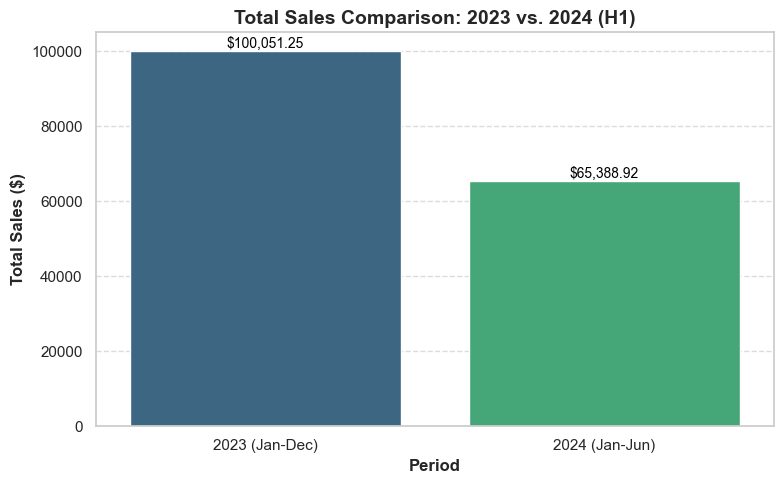

In [286]:
plt.figure(figsize=(8, 5))
periods = ['2023 (Jan-Dec)', '2024 (Jan-Jun)']
total_sales = [total_sales_2023, total_sales_2024]

bars = sns.barplot(x=periods, y=total_sales, palette='viridis')
plt.title('Total Sales Comparison: 2023 vs. 2024 (H1)', fontsize=14, fontweight='bold')
plt.xlabel('Period', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.savefig('total_sales_comparison.png')
plt.show()

### Comparativa de los top 5 productos más vendidos entre ambos períodos
Se comparan los ingresos generados por los 5 productos más vendidos en el 2023 y 2024:

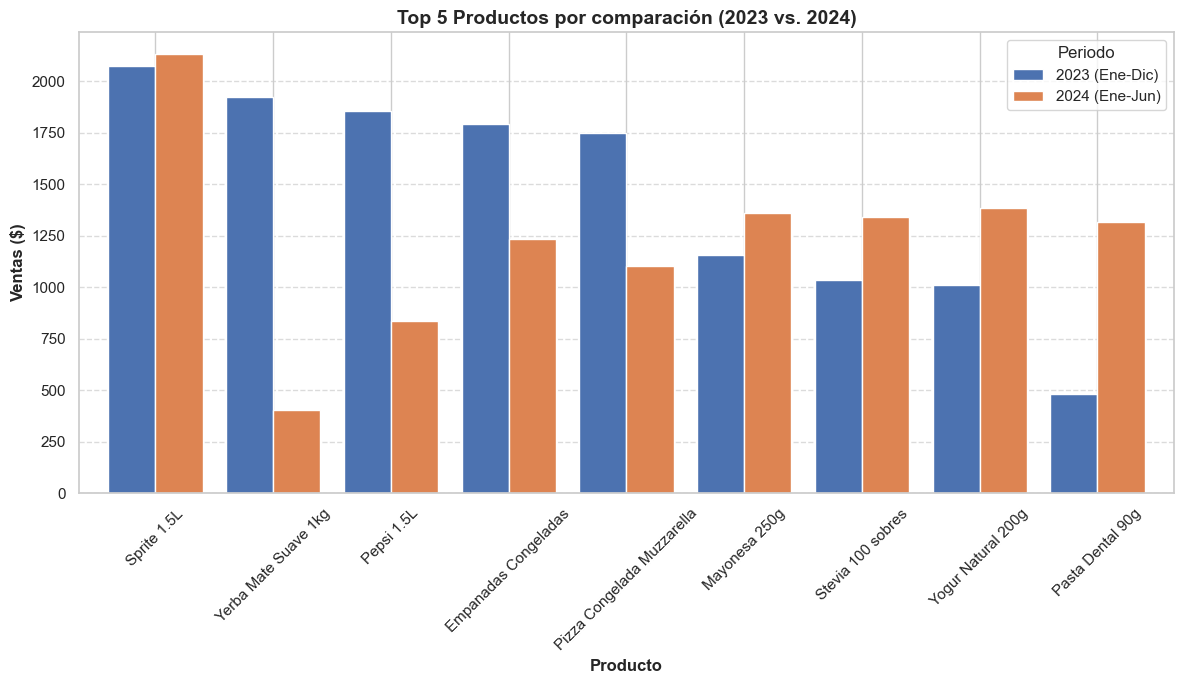

In [287]:
n_top_products = 5

# Combinar los índices de los top productos de ambos años
common_products = sales_by_product_2023.head(n_top_products).index.union(
    sales_by_product_2024.head(n_top_products).index
)

# Crear DataFrame combinado para comparación
compare_products = pd.DataFrame({
    '2023_Sales': sales_by_product_2023.reindex(common_products, fill_value=0),
    '2024_Sales': sales_by_product_2024.reindex(common_products, fill_value=0)
})

# Ordenar por ventas de 2023 para mejor visualización
compare_products = compare_products.sort_values(by='2023_Sales', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
compare_products.plot(kind='bar', ax=ax, width=0.8)

ax.set_title(f'Top {n_top_products} Productos por comparación (2023 vs. 2024)', fontsize=14, fontweight='bold')
ax.set_xlabel('Producto', fontsize=12, fontweight='bold')
ax.set_ylabel('Ventas ($)', fontsize=12, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(['2023 (Ene-Dic)', '2024 (Ene-Jun)'], title='Periodo')

plt.tight_layout()
plt.savefig('ventas_por_producto_comparacion.png')
plt.show()

### Interpretación del Análisis Comparativo de Ventas (2023 vs. 2024)

El análisis comparativo de las ventas totales y por producto entre el año 2023 completo y el primer semestre de 2024 (`2024 H1`) revela las siguientes tendencias y diferencias clave:

#### 1. Comparación de Ventas Totales:
*   **Total de Ventas 2023 (Enero-Diciembre):** `$100,051.25`
*   **Total de Ventas 2024 (Enero-Junio):** `$65,388.92`

**Interpretación:** Es importante notar que se están comparando 12 meses de 2023 con 6 meses de 2024. Para una comparación más equitativa, podríamos proyectar las ventas de 2024 H1 o comparar solo el primer semestre de 2023. Sin embargo, observando los valores absolutos, las ventas de 2024 H1 ya representan una parte significativa de las ventas anuales de 2023, lo que sugiere un desempeño fuerte en el primer semestre de 2024. Si las ventas de 2024 se duplicaran para el año completo, superarían las ventas de 2023.

#### 2. Comparación de Ventas por Producto:

**Productos Más Vendidos en 2023:**
1.  **Sprite 1.5L:** $2,075.20
2.  **Yerba Mate Suave 1kg:** $1,922.23
3.  **Pepsi 1.5L:** $1,855.80
4.  **Empanadas Congeladas:** $1,792.35
5.  **Pizza Congelada Muzzarella:** $1,751.90

**Productos Más Vendidos en 2024 H1:**
1.  **Sprite 1.5L:** $2,131.91
2.  **Yogur Natural 200g:** $1,383.90
3.  **Mayonesa 250g:** $1,362.98
4.  **Stevia 100 sobres:** $1,341.99
5.  **Pasta Dental 90g:** $1,317.04

**Tendencias y Diferencias Clave por Producto:**
*   **Consistencia de Sprite 1.5L:** 'Sprite 1.5L' se mantiene como el producto líder en ventas en ambos períodos, e incluso muestra un ligero aumento en el monto total de ventas en el primer semestre de 2024 comparado con el total de 2023. Esto subraya su posición como un producto estrella y un generador de ingresos muy fiable.
*   **Cambio en Otros Productos Top:** Mientras que en 2023, bebidas (Yerba Mate, Pepsi) y alimentos congelados (Empanadas, Pizza) dominaban el top 5, en 2024 H1 la lista se diversifica significativamente con la entrada de 'Yogur Natural 200g', 'Mayonesa 250g', 'Stevia 100 sobres' y 'Pasta Dental 90g'. Esto podría indicar un cambio en las preferencias de los consumidores o un mayor enfoque en productos de consumo diario y de cuidado personal en el primer semestre de 2024.
*   **Desaparición de Productos del Top:** Productos como 'Yerba Mate Suave 1kg', 'Pepsi 1.5L', 'Empanadas Congeladas' y 'Pizza Congelada Muzzarella', que estaban en el top 5 de 2023, no aparecen en el top 5 de 2024 H1. Esto no significa necesariamente una disminución en sus ventas absolutas, sino que otros productos han generado más ingresos relativos en el primer semestre de 2024.

**Conclusiones Generales:**
*   **Crecimiento Sostenido:** A pesar de ser una comparación de períodos de duración diferente, los datos sugieren un buen ritmo de ventas en 2024, con el primer semestre ya generando más del 65% de las ventas totales del año anterior.
*   **Diversificación del Consumo:** Se observa una diversificación en los productos que generan mayores ingresos. Esto puede ser una oportunidad para ajustar las estrategias de marketing y promoción, dirigiéndolas a las nuevas tendencias o reforzando los productos emergentes.
*   **Importancia del Monitoreo Continuo:** Es crucial seguir monitoreando estas tendencias para confirmar si los cambios en el top de productos son estacionales, responden a campañas específicas o reflejan un cambio más profundo en el comportamiento del consumidor.

## Calcular Consumo por Rango de Edad

Calcular el total de consumo (`monto_final`) para cada rango de edad de los clientes (`edad_rango`) utilizando el DataFrame `df_2023`.


In [288]:
# Análisis de consumo por rango de edad en 2023 y 2024
consumption_by_age_2023 = df_2023.groupby('edad_rango')['monto_final'].sum().round(2).sort_values(ascending=False)
print("Consumo por rango de edad en 2023:")
display(consumption_by_age_2023)

consumption_by_age_2024 = df_2024.groupby('edad_rango')['monto_final'].sum().round(2).sort_values(ascending=False)
print("\nConsumo por rango de edad en 2024:")
display(consumption_by_age_2024)

Consumo por rango de edad en 2023:


edad_rango
26-40    51424.14
41-55    21739.30
18-25    17920.89
56+       8966.92
Name: monto_final, dtype: float64


Consumo por rango de edad en 2024:


edad_rango
26-40    34068.02
18-25    13529.10
41-55    13377.27
56+       4414.53
Name: monto_final, dtype: float64

In [289]:
comparativa_consumo = pd.DataFrame({
    'Consumo_2023': consumption_by_age_2023,
    'Consumo_2024': consumption_by_age_2024
}).fillna(0)

print("Consumo por rango de edad 2023 y 2024:")
display(comparativa_consumo)

Consumo por rango de edad 2023 y 2024:


,Consumo_2023,Consumo_2024
edad_rango,,
18-25,17920.89,13529.10
26-40,51424.14,34068.02
41-55,21739.30,13377.27
56+,8966.92,4414.53


### Visualización del Consumo por Rango de Edad (2023 y 2024)


<Figure size 1200x700 with 0 Axes>

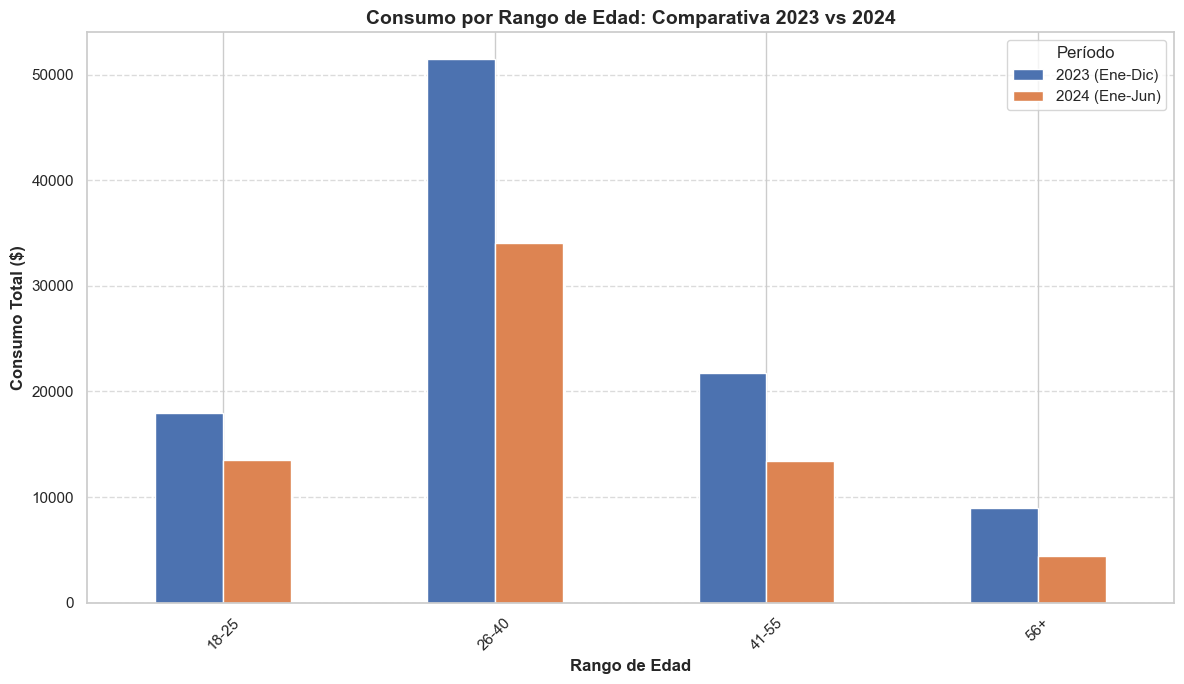

In [290]:
plt.figure(figsize=(12, 7))
comparativa_consumo.plot(kind='bar', figsize=(12, 7))
plt.title('Consumo por Rango de Edad: Comparativa 2023 vs 2024', fontsize=14, fontweight='bold')
plt.xlabel('Rango de Edad', fontsize=12, fontweight='bold')
plt.ylabel('Consumo Total ($)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['2023 (Ene-Dic)', '2024 (Ene-Jun)'], title='Período')
plt.tight_layout()
plt.savefig('consumo_edad_rango_comparativo.png')
plt.show()

### Interpretación del Consumo por Rango de Edad (2023 vs. 2024)

| **Rango de Edad** | **Consumo 2023 (Ene-Dic)** | **Consumo 2024 (Ene-Jun)**             | **Variación / Observaciones Clave**                                                                    | **Tendencia Estratégica**                                                                              |
| ----------------- | -------------------------- | ----------------------------------------- | ------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------ |
| **18–25 años**    | Medio                      | Alto (↑ respecto 2023)                    | Aumenta y supera al grupo 41–55; posible incremento de frecuencia de compra o nuevos clientes jóvenes. | Grupo emergente; potencial alto para campañas digitales y promociones dirigidas.                    |
| **26–40 años**    | Muy alto                   | Muy alto (ligeramente menor en absolutos) | Se mantiene como el segmento líder de consumo en ambos períodos.                                       | Pilar central del negocio; mantener foco en fidelización y estrategias premium.                     |
| **41–55 años**    | Alto                       | Medio                                     | Desciende un puesto en el ranking; el consumo sigue siendo importante pero pierde peso relativo.       | Requiere análisis de comportamiento y reactivación con nuevas ofertas.                              |
| **56+ años**      | Bajo                       | Bajo                                      | Segmento más estable y de menor gasto en ambos períodos.                                               | Mantener presencia básica; no prioritario para crecimiento, pero útil para estrategias de retención. |


## 6: Interpretación de Resultados para el Problema de Negocio

En esta fase, consolidaremos los hallazgos de las fases anteriores (estadísticas descriptivas, análisis de distribución, análisis de correlación y detección de outliers) y los interpretaremos en el contexto del negocio de Aurelion.

### Resumen de Hallazgos Clave:

1. **Estadísticas Descriptivas (Básicas y Avanzadas):**
   * La **cantidad** promedio de productos por detalle de venta es baja (~2.68 unidades), con una distribución relativamente simétrica y variabilidad moderada.
   * El **precio unitario** de los productos varía considerablemente ($2.72
   a $49.82), con una distribución también relativamente simétrica y variabilidad moderada.
   * El **importe**, **subtotal**, **monto final**, **monto bruto** y **monto neto** (variables monetarias) muestran un claro **sesgo positivo** (confirmado por asimetría > 0.5) y **alta variabilidad** (alto Coeficiente de Varianza > 50%). Esto indica que la mayoría de las transacciones son de bajo valor, pero existen algunas transacciones de alto valor que influyen significativamente en la media. Por ejemplo, el importe promedio por detalle de venta es de **$83.86**, pero la mediana es de **$76.40**, y el máximo es de **$249.10**.
   * El **descuento aplicado** es poco frecuente (promedio ~1.17%) y cuando se aplica, los porcentajes son limitados (máximo 15%). El 75% de los detalles de venta no tienen descuento (Q3 en `descuento_aplicado_pct` es 0).
   * La igualdad entre **monto bruto** y **monto neto** a nivel de venta en este dataset ($279.66 en promedio) sugiere que los descuentos a nivel de detalle no se reflejan en estas columnas de resumen de venta, lo cual es un punto a validar con la fuente de datos.
2. **Distribución de Variables:**
   * Las visualizaciones (histogramas, box plots y violin plots) confirmaron el sesgo positivo y la concentración de datos en valores bajos para las variables monetarias.
   * La distribución de `descuento_aplicado_pct` es altamente sesgada, confirmando que los descuentos son raros.
   * `cantidad` y `precio_unitario_x` tienen distribuciones más simétricas.
3. **Análisis de Correlación (Pearson y Spearman):**
   * Existe una fuerte correlación positiva entre las variables de valor monetario a nivel de detalle de venta (`importe`, `subtotal`, `monto_final`), como es esperado (valores cercanos a 1).
   * Se observa una correlación positiva moderada a fuerte entre la `cantidad` y las variables monetarias de detalle (ej. correlación de **0.71** con `importe`), indicando que comprar más artículos generalmente resulta en un mayor importe por detalle.
   * También hay una correlación positiva moderada entre el `precio_unitario_x` y las variables monetarias de detalle (ej. correlación de **0.63** con `importe`), sugiriendo que productos con mayor precio unitario tienden a contribuir a detalles de venta de mayor valor.
   * La correlación entre `cantidad` y `precio_unitario_x` es muy débil (**-0.0175** en Pearson, **-0.0085** en Spearman), lo que significa que la cantidad de artículos comprados no está fuertemente relacionada linealmente con su precio unitario en un mismo detalle de venta.
   * Correlación perfecta entre `monto_bruto` y `monto_neto` (**1.00**).
   * Resultados de Spearman consistentes con Pearson, sugiriendo relaciones monótonas similares a lineales.
4. **Detección de Outliers (Método IQR y Z-score):**
   * Se identificó un pequeño número de posibles **outliers** (entre 6 y 10) en variables monetarias, representando transacciones de valor significativamente alto. Por ejemplo, se detectaron **8 outliers** en `monto_final` con el método IQR.
   * Alta cantidad de "outliers" en `descuento_aplicado_pct` (**307** por IQR, representando un **15.23%** de los registros) confirma baja frecuencia de descuentos, ya que la mayoría de los valores son 0.
5. **Intervalos de Confianza (95%):**
   * Proporcionan rangos estimados para las verdaderas medias poblacionales. Ej: monto bruto promedio por venta entre aproximadamente **$273.28 y $286.04**. El importe promedio por detalle de venta está entre **$81.48 y $86.24**. Útiles para entender la precisión de las estimaciones.
6. **Análisis RFM de Clientes:**
   * La segmentación RFM identificó grupos de clientes con diferentes comportamientos de compra (Champions, Loyal, Potential, At Risk, Lost).
   * Los segmentos Champions (**24.2%** de clientes) y Loyal (**23.2%**), aunque no son la mayoría en número, representan una proporción significativa del valor monetario total (Champions contribuyen con el **55.05%** y Loyal con el **20.60%**), destacando su importancia para el negocio.
   * Esta segmentación es crucial para dirigir estrategias de marketing y retención personalizadas.
7. **Análisis de Ingresos por Producto:**
   * Identificó los productos clave que más contribuyen a los ingresos totales (ej: Sprite 1.5L con **$4,269.04** en ingresos totales, Empanadas Congeladas con **$3,057.92**).
   * El análisis del ingreso promedio por transacción para estos productos, junto con los intervalos de confianza, proporciona una estimación de su valor típico por cada vez que son comprados (ej. Sprite 1.5L tiene un ingreso promedio por transacción de **$158.11** con un IC 95% de **[$136.68, $179.55]**).
   * Esta información es vital para la gestión de inventario, promociones y decisiones de marketing.
8. **Análisis Temporal de Ventas:**
   * La serie temporal de ventas semanales con media móvil y bandas de confianza permite visualizar la evolución de los ingresos y su tendencia a lo largo del tiempo (desde enero 2023 a junio 2024).
   * El box plot por Año-Mes muestra la distribución de los importes de venta en cada mes, ayudando a identificar posibles patrones estacionales o cambios en la variabilidad.
   * El test de Kruskal-Wallis evaluó si las diferencias en los importes entre meses son estadísticamente significativas, encontrando un p-value de **0.3878**, lo que sugiere que no hay diferencias significativas detectadas entre los meses en este análisis.
9. **Análisis Comparativo de Ventas (2023 vs. 2024):**
   * Las ventas totales de lo que va del 2024 ($65,388.92) representan una parte significativa de las ventas anuales de 2023 ($100,051.25), sugiriendo un buen desempeño en el primer semestre de 2024.
   * 'Sprite 1.5L' se mantiene como el producto líder en ventas en ambos períodos, con un ligero aumento en lo que va del 2024.
   * Se observa una diversificación en los productos que generan mayores ingresos en 2024, con la entrada de productos de consumo diario y cuidado personal.
10. **Consumo por Rango de Edad (2023 vs. 2024):**
    * El grupo de edad 26–40 años se mantiene como el segmento líder de consumo en ambos períodos.
    * El grupo de 18–25 años muestra un aumento en el consumo en 2024, superando al grupo 41–55 años.
    * El grupo de 41–55 años desciende en el ranking de consumo, mientras que el grupo de 56+ años se mantiene estable y de menor gasto.  

### Interpretación en el Contexto del Negocio:

* El hecho de que la mayoría de las transacciones sean de bajo valor y con pocas unidades sugiere la importancia de estrategias para aumentar el ticket promedio (por ejemplo, promociones por volumen, recomendaciones de productos complementarios).
* La baja frecuencia de descuentos aplicados indica que no es una estrategia de ventas generalizada. Podría explorarse si la aplicación estratégica de descuentos en ciertos productos o a ciertos clientes podría aumentar las ventas o la lealtad.
* Las fuertes correlaciones entre cantidad, precio unitario y el valor del detalle de venta son lógicas, pero es importante entender qué productos o categorías contribuyen más a los detalles de venta de alto valor.
* Los outliers identificados en las variables monetarias podrían representar transacciones importantes (por ejemplo, compras de grandes volúmenes, productos de alto margen o patrones de compra a granel). Investigar estas transacciones podría revelar información sobre clientes clave o tipos de productos que generan mayores ingresos por transacción.
* La discrepancia entre `monto_bruto`/`monto_neto` y el cálculo del descuento a nivel de detalle (`monto_final`) es un punto a aclarar para asegurar que entendemos cómo se registran y calculan los valores de venta totales.
* Los intervalos de confianza nos dan una idea de la precisión de nuestras estimaciones de los promedios de ventas, lo cual es útil para la planificación y la toma de decisiones basadas en datos.
* La segmentación RFM permite enfocar los esfuerzos en los clientes de mayor valor (Champions y Loyal representan más del 75% del valor monetario total) y diseñar estrategias específicas para cada grupo (retención, reactivación, etc.).
* La identificación de los productos de mayor ingreso ayuda a optimizar el inventario, destacar estos productos en marketing y potencialmente desarrollar promociones cruzadas.
* El análisis temporal es fundamental para entender la estacionalidad de las ventas, identificar tendencias y predecir el desempeño futuro. El test de Kruskal-Wallis sugiere que, en este dataset, no hay diferencias estadísticamente significativas en los importes de venta entre meses.
* El análisis comparativo de ventas entre 2023 y 2024 H1 indica un buen desempeño en el primer semestre de 2024, con una diversificación en los productos más vendidos, lo que podría reflejar cambios en las preferencias del consumidor.
* El análisis comparativo de consumo por rango de edad revela cambios en el comportamiento de compra entre 2023 y 2024, destacando el crecimiento del segmento joven (18–25 años) y la estabilidad del segmento mayor (56+ años). 

Este análisis estadístico, incluyendo las métricas avanzadas, la detección de outliers, la segmentación RFM y el análisis temporal, nos ha proporcionado una base sólida para comprender las características de nuestros datos de ventas y sienta las bases para análisis más avanzados o la toma de decisiones comerciales informadas.

## 7: Documentación de Hallazgos y Cumplimiento de Criterios

Basándonos en el análisis exploratorio realizado en las fases anteriores y los criterios de evaluación de datos del documento "Anexo_Criterios.pdf", documentamos los hallazgos clave y evaluamos el estado actual de la calidad de los datos en el DataFrame `df_master`.

### Resumen de la Calidad de Datos según Criterios del Anexo:

* **Cumplimiento con las reglas de negocio:**
  * La correspondencia lógica entre las tablas (`df_ventas`, `df_detalle_ventas`, `df_productos`, `df_clientes`, `df_sucursales`, `df_vendedores`, `df_medios_pago`) fue verificada y parece correcta en términos de claves foráneas. Todos los IDs de las tablas de detalle/ventas tienen correspondencia en las tablas maestras.
  * La relación entre `nombre_producto`, `categoria` y `subcategoria` en `df_productos` fue examinada y se realizaron correcciones para asegurar la consistencia, alineándose con la regla de tener categorías y subcategorías lógicas para cada producto.
  * Las ciudades en `df_clientes` tienen una sucursal asociada en `df_sucursales`, lo cual es una regla de negocio importante verificada.
  * La observación de que `monto_bruto` y `monto_neto` son idénticos en `df_ventas`, a pesar de la existencia de `descuento_aplicado_pct` en `df_detalle_ventas`, sugiere un punto a validar con la fuente de datos sobre cómo se calculan los montos totales de venta y si los descuentos deberían reflejarse a ese nivel.
* **Formato y tipo de dato correctos:**
  * La revisión inicial con `.info()` confirmó que las columnas tienen tipos de datos apropiados (ej. `datetime64[ns]` para fechas, `float64` para montos, `int64` para IDs, `object` para texto).
  * La conversión explícita de columnas de fecha (`fecha_alta`, `fecha`, `fecha_ingreso`) a tipo datetime se realizó correctamente.
* **Consistentes y únicos:**
  * Las verificaciones de correspondencia de IDs entre tablas sugieren que las relaciones están bien definidas y no hay "huérfanos" en las tablas de detalle/transacción que apunten a IDs inexistentes en las tablas maestras.
  * No se realizó una verificación exhaustiva de duplicados en todas las tablas, pero la carga inicial no mostró un problema evidente en la estructura general para las métricas clave analizadas. Sin embargo, para análisis más detallados o ETLs de producción, se recomendaría verificar la unicidad de registros donde sea aplicable (ej. ventas únicas, clientes únicos si fuera necesario identificar duplicados por otros criterios además del ID).
* **Completos (manejo de nulos):**
  * La verificación inicial con `.isnull().sum()` mostró que no hay valores nulos en las columnas clave utilizadas para el análisis y la unificación de tablas. Esto indica que los datos esenciales están completos para los fines de este análisis exploratorio y estadístico.

### Resumen Consolidado de Hallazgos Clave del Análisis Estadístico:

1. **Estadísticas Descriptivas (Básicas y Avanzadas):**
   * Variables monetarias (`importe`, `subtotal`, `monto_final`, `monto_bruto`, `monto_neto`) muestran **sesgo positivo** y **alta variabilidad** (CV > 50%), indicando predominio de transacciones de bajo valor con algunas de alto valor. `cantidad` y `precio_unitario` son más **simétricas** y con variabilidad moderada. Se confirma la igualdad entre `monto_bruto` y `monto_neto`.
   * El **descuento aplicado** es poco frecuente (promedio ~1.17%) y limitado (máximo 15%).
2. **Distribución de Variables:**
   * Visualizaciones (histogramas, box plots, violin plots) reafirman el sesgo positivo en variables monetarias y la concentración de datos en valores bajos.
3. **Análisis de Correlación (Pearson y Spearman):**
   * Fuertes correlaciones positivas entre variables monetarias a nivel de detalle.
   * Correlación positiva moderada a fuerte entre `cantidad` y variables monetarias de detalle.
   * Correlación positiva moderada entre `precio_unitario_x` y variables monetarias de detalle.
   * Correlación muy débil entre `cantidad` y `precio_unitario_x`.
   * Correlación perfecta entre `monto_bruto` y `monto_neto`.
   * Resultados de Spearman consistentes con Pearson, sugiriendo relaciones monótonas similares a lineales.
4. **Detección de Outliers (Método IQR y Z-score):**
   * Se identificó un pequeño número de posibles **outliers** (entre 6 y 10) en variables monetarias, representando transacciones de valor significativamente alto.
   * Alta cantidad de "outliers" en `descuento_aplicado_pct` (15.23% por IQR) confirma baja frecuencia de descuentos.
5. **Intervalos de Confianza (95%):**
   * Proporcionan rangos estimados para las verdaderas medias poblacionales. Ej: monto bruto promedio por venta entre ~$273.28 y ~$286.04. Útiles para entender la precisión de las estimaciones.
6. **Análisis RFM de Clientes:**
   * La segmentación RFM identificó grupos de clientes con diferentes comportamientos de compra (Champions, Loyal, Potential, At Risk, Lost).
   * Los segmentos Champions (**24.2%** de clientes) y Loyal (**23.2%**), aunque no son la mayoría en número, representan una proporción significativa del valor monetario total (Champions contribuyen con el **55.05%** y Loyal con el **20.60%**), destacando su importancia para el negocio.
   * Esta segmentación es crucial para dirigir estrategias de marketing y retención personalizadas.
7. **Análisis de Ingresos por Producto:**
   * Identificó los productos clave que más contribuyen a los ingresos totales (ej: Sprite 1.5L con **$4,269.04** en ingresos totales, Empanadas Congeladas con **$3,057.92**).
   * El análisis del ingreso promedio por transacción para estos productos, junto con los intervalos de confianza, proporciona una estimación de su valor típico por cada vez que son comprados (ej. Sprite 1.5L tiene un ingreso promedio por transacción de **$158.11** con un IC 95% de **[$136.68, $179.55]**).
   * Esta información es vital para la gestión de inventario, promociones y decisiones de marketing.
8. **Análisis Temporal de Ventas:**
   * La serie temporal de ventas semanales con media móvil y bandas de confianza permite visualizar la evolución de los ingresos y su tendencia a lo largo del tiempo (desde enero 2023 a junio 2024).
   * El box plot por Año-Mes muestra la distribución de los importes de venta en cada mes, ayudando a identificar posibles patrones estacionales o cambios en la variabilidad.
   * El test de Kruskal-Wallis evaluó si las diferencias en los importes entre meses son estadísticamente significativas, encontrando un p-value de **0.3878**, lo que sugiere que aparentemente no hay diferencias significativas detectadas, lo que sugiere continuar un análisis más detallado.
9. **Análisis Comparativo de Ventas (2023 vs. 2024):**
   * Las ventas totales de 2024 H1 ($65,388.92) representan una parte significativa de las ventas anuales de 2023 ($100,051.25), sugiriendo un buen desempeño en el primer semestre de 2024.
   * 'Sprite 1.5L' se mantiene como el producto líder en ventas en ambos períodos, con un ligero aumento en 2024 H1.
   * Se observa una diversificación en los productos que generan mayores ingresos en 2024 H1, con la entrada de productos de consumo diario y cuidado personal.
10. **Consumo por Rango de Edad (2023 vs. 2024):**
    * El grupo de edad 26–40 años se mantiene como el segmento líder de consumo en ambos períodos.
    * El grupo de 18–25 años muestra un aumento en el consumo en 2024, superando al grupo 41–55 años.
    * El grupo de 41–55 años desciende en el ranking de consumo, mientras que el grupo de 56+ años se mantiene estable y de menor gasto.  

### Interpretación en el Contexto del Negocio (Consolidado):

El análisis estadístico y la visualización nos han proporcionado información valiosa para el negocio de Aurelion:

* **Patrones de Compra:** La mayoría de los clientes compran pocas unidades por transacción de bajo valor. Oportunidad para aumentar el ticket promedio.
* **Productos y Categorías Clave:** Identificación de productos más vendidos y categorías de mayores ingresos (`Almacén`, `Limpieza`, `Bebidas`) crucial para gestión y marketing.
* **Rendimiento por Sucursal:** Diferencias de rendimiento permiten identificar sucursales exitosas y áreas de mejora.
* **Métodos de Pago:** Predominio de efectivo, útil para optimizar opciones de pago.
* **Outliers en Ventas:** Transacciones de alto valor identificadas como outliers merecen investigación para entender clientes premium o productos de alto margen.
* **Descuentos:** Baja frecuencia sugiere enfoque en precios regulares. Evaluar impacto de descuentos estratégicos.
* **Validación de Datos:** La discrepancia entre `monto_bruto`/`monto_neto` y descuentos a nivel de detalle es un punto crítico a validar con la fuente.
* **Segmentación de Clientes:** El análisis RFM permite enfocar los esfuerzos en los clientes de mayor valor (Champions y Loyal representan más del 75% del valor monetario total) y diseñar estrategias específicas para cada grupo (retención, reactivación, etc.).
* **Productos Clave por Ingresos:** La identificación de los productos de mayor ingreso ayuda a optimizar el inventario, destacar estos productos en marketing y potencialmente desarrollar promociones cruzadas.
* **Tendencias Temporales:** El análisis temporal es fundamental para entender la estacionalidad de las ventas, identificar tendencias y predecir el desempeño futuro. El test de Kruskal-Wallis sugiere que, en este dataset, aparentemente no hay diferencias estadísticamente significativas, lo que sugiere continuar un análisis más detallado para confirmar patrones estacionales o posibles sesgos en los datos.
* **Comparativo 2023 vs. 2024:** Buen desempeño en el primer semestre de 2024 con diversificación en productos más vendidos, reflejando posibles cambios en preferencias del consumidor.        
* **Consumo por Rango de Edad:** Cambios en comportamiento de compra entre 2023 y 2024, destacando crecimiento del segmento joven (18–25 años) y estabilidad del segmento mayor (56+ años).

En resumen, el análisis realizado ha seguido los pasos definidos y ha permitido evaluar la calidad de los datos según los criterios proporcionados, sentando una base sólida para análisis más profundos y la toma de decisiones informadas.


### Próximos Pasos

| Enfoque | Acciones Propuestas |
|---|---|
**Segmentación Inteligente** | Extender RFM con *clustering* avanzado (K-Means, DBSCAN) para identificar microsegmentos, detectar grupos emergentes y generar estrategias personalizadas basadas en comportamiento. |
**Modelos Predictivos** | Desarrollo de modelos de *forecasting* para demanda y flujo de ingresos. Implementar modelos supervisados para predicción de churn (Logistic Regression, Random Forest, XGBoost) y probabilidad de recompra. Preparar el camino hacia modelos prescriptivos y series de tiempo avanzadas |
**Optimización Comercial** | Crear pipelines ETL para actualización automática, para retención (Champions, Loyal) y reactivación (At-Risk, Lost). Evaluación de *lift* y *ROI* en campañas por segmento. 
**Gestión y Control de Descuentos** | Estimar elasticidad precio-demanda y construir reglas dinámicas para descuentos máximos permitidos según perfil y riesgo de fuga. |
**Detección de Anomalías & Riesgo** | Aplicar sistemas de *anomaly detection* (Isolation Forest, Z-score adaptativo) para identificar escenarios de fraude, errores de captura o transacciones atípicas con impacto financiero. |
**Calidad y Gobierno de Datos** | Estandarizar y enriquecer `df_master`: validar consistencia, consolidar diccionario de datos, agregar variables derivadas (temporalidad, flags de outliers, métricas de cliente) y asegurar consistencia entre montos, descuentos y transacciones. Generar reglas de calidad y auditoría periódica. |
**Gestión de Outliers** | Documentar casos específicos detectados; evaluar su origen (picos de demanda, ventas corporativas, errores). Definir si se excluyen, capean o modelan por separado para modelos analíticos. |
**Visualización y Monitoreo** | Construcción de dashboard ejecutivo (Power BI / Streamlit) con alertas automáticas, seguimiento de KPIs y análisis drill-down por segmento, producto y periodo. |

> **Objetivo central:** evolucionar de análisis descriptivo a **analítica predictiva y prescriptiva**, institucionalizando procesos y modelos que respalden decisiones estratégicas y operativas basadas en datos.
